# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

Para resolver un problema lo primero que se debe hacer es entenderlo, por lo cual, como primer paso es necesario buscar informacion relacionada a la solución del mismo, por ejemplo articulos publicados en revistas , congresos o cualquier otra fuente de informacion confiable y reconocida. Estos articulos deben tener como enfoque la solución de una problematica similar de tal manera que se puedan tomar como punto de partida para dar un flujo de trabajo  a la solución planteada por nosotros.

Posteriormente a haber planificado un flujo de trabajo, lo que nos resta es ejecutarlo. Por ello debemos recolectar la información que hayamos definido como pertinente, en el caso especifico de predecir el precio de una propiedad, debemos juntar la mayor cantidad posible de muestras y  caracteirsticas de entrenamiento teniendo cuidado con el overfitting. Tener precios de casas en funcion de caracteristicas como; numero de piezas, area del terreno, numero de baños, zona residencial, entre otros, nos permitirá entrenar de mejor forma el modelo de machine learning y obtener un precio muy cercano a la realidad.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
#Parametros de graficas 
ct='#4B7D7A'# color titulo
cg='#76B0DC' #color Grafica
tt=20 #tamaño titulo
te=15 #Tamaño ejes 
cm='BrBG' #color mapa de colores

In [3]:
import pandas as pd 
import numpy as np 
from IPython.display import HTML, display_html, display
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
sns.set()

#Cargamos el dataset usando pandas
data_properaty=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
display(HTML('<h2>Propiedades Properaty</h2>'))
display_html(data_properaty)

start_date 
 end_date 
 created_on 
 lat 
 lon 
 l1 
 l2 
 l3 
 rooms 
 bedrooms 
 bathrooms 
 surface_total 
 surface_covered 
 price 
 currency 
 title 
 description 
 property_type 
 operation_type 
 
 
 
 
 0 
 2019-10-17 
 2019-12-23 
 2019-10-17 
 -34.605880 
 -58.384949 
 Argentina 
 Capital Federal 
 San Cristobal 
 7.0 
 7.0 
 2.0 
 140.0 
 140.0 
 153000.0 
 USD 
 ***Venta semipiso centro, ideal hostel***** 
 DESCRIPCION DE LA PROPIEDAD: Departamento de 1... 
 Departamento 
 Venta 
 
 
 1 
 2019-10-17 
 2019-11-21 
 2019-10-17 
 -34.624056 
 -58.412110 
 Argentina 
 Capital Federal 
 Boedo 
 2.0 
 1.0 
 2.0 
 70.0 
 58.0 
 159000.0 
 USD 
 Espectacular PH reciclado en Boedo sin expensas. 
 PH reciclado en Boedo a una cuadra de la plaz... 
 PH 
 Venta 
 
 
 2 
 2019-10-17 
 2019-11-01 
 2019-10-17 
 -34.593569 
 -58.427474 
 Argentina 
 Capital Federal 
 Palermo 
 2.0 
 1.0 
 1.0 
 45.0 
 45.0 
 125000.0 
 USD 
 Depto.tipo casa de 2 ambientes en Venta en Pal... 
 2 ambienets amplio , excelente estado , patio ... 
 PH 
 Venta 
 
 
 3 
 2019-10-17 
 2019-12-23 
 2019-10-17 
 -34.581294 
 -58.436754 
 Argentina 
 Capital Federal 
 Palermo 
 2.0 
 1.0 
 1.0 
 85.0 
 50.0 
 295000.0 
 USD 
 COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH... 
 HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE... 
 PH 
 Venta 
 
 
 4 
 2019-10-17 
 2020-03-11 
 2019-10-17 
 -34.914194 
 -57.938219 
 Argentina 
 Bs.As. G.B.A. Zona Sur 
 La Plata 
 2.0 
 1.0 
 1.0 
 50.0 
 35.0 
 40000.0 
 USD 
 58 entre 1 y 2 Venta de departamento en ph.1 ... 
 58 entre 1 y 2 Venta de departamento en PH. P... 
 PH 
 Venta 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 146655 
 2019-07-31 
 2019-08-13 
 2019-07-31 
 -34.816348 
 -58.181963 
 Argentina 
 Bs.As. G.B.A. Zona Sur 
 Berazategui 
 2.0 
 1.0 
 1.0 
 54.0 
 48.0 
 165000.0 
 USD 
 Departamento en Venta en Barrio Privado Barran... 
 Departamento de 2 ambientesCocina con alacena ... 
 Departamento 
 Venta 
 
 
 146656 
 2019-07-31 
 2019-08-14 
 2019-07-31 
 -34.446459 
 -58.937810 
 Argentina 
 Bs.As. G.B.A. Zona Norte 
 Pilar 
 4.0 
 3.0 
 2.0 
 164.0 
 90.0 
 130000.0 
 USD 
 Venta departamentos tres dormitorios jardín co... 
 Muy buen duplex a estrenar en dos plantas más ... 
 Departamento 
 Venta 
 
 
 146657 
 2019-07-31 
 2019-08-14 
 2019-07-31 
 -34.444633 
 -58.981606 
 Argentina 
 Bs.As. G.B.A. Zona Norte 
 Pilar 
 1.0 
 1.0 
 1.0 
 50.0 
 35.0 
 73000.0 
 USD 
 Venta departamento de un ambiente Manzanares C... 
 En los Condominios de Campo Manzanares Chico, ... 
 Departamento 
 Venta 
 
 
 146658 
 2019-07-31 
 2019-08-14 
 2019-07-31 
 -34.444830 
 -58.981796 
 Argentina 
 Bs.As. G.B.A. Zona Norte 
 Pilar 
 2.0 
 1.0 
 1.0 
 38.0 
 38.0 
 68000.0 
 USD 
 Departamento en Venta. Manzanares chico. 
 Broker: Maria 11Departamento de dos ambientes ... 
 Departamento 
 Venta 
 
 
 146659 
 2019-07-31 
 2019-10-12 
 2019-07-31 
 -34.444760 
 -58.981885 
 Argentina 
 Bs.As. G.B.A. Zona Norte 
 Pilar 
 3.0 
 2.0 
 1.0 
 75.0 
 75.0 
 98000.0 
 USD 
 Departamento en venta en Manzanares Chico 
 Departamento en el Barrio Manzanares Chico , e... 
 Departamento 
 Venta 
 
 
 
 146660 rows × 19 columns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [4]:
#Echamos un vistazo inicial al dataset usando algunos metodos
print(data_properaty.head())
print('------------------------------------------------------')
print(data_properaty.describe())
print('------------------------------------------------------')
print(data_properaty.columns)
print('------------------------------------------------------')
print(data_properaty.index)


   start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1         

Con las funciones head, describe, columns e index podemos hacernos una imagen mas clara de nuestro dataset, por ejemplo ahora sabemos que nuestro dataset esta conformado por 146660 datos organizados en filas y que cada una de estas filas tiene  informacion de caracteristcas como numero de habitaciones, superficie total, precio, descripcion, latitud y longitud, entre otras. Ademas tambien sabemos que no todas las columnas estan llenas para todas las filas por lo que hay valores nulos en ellas, para poder saber cuantos valores nulos existen podemos usar otra funcion de pandas llamada isna,ademas tambien seria bueno verificar si hay propiedades que aparecen mas de una vez en el dataset para ello usamos unique.

In [5]:
valores_nulos=np.sum(data_properaty.isna().values)
print(f'Hay {valores_nulos} valores nulos')
data_properaty_copy=data_properaty.copy()
data_properaty_copy['ubicacion']=data_properaty_copy["lat"].map(str) + " " + data_properaty_copy["lon"].map(str)  #dos porpiedades distintas no pueden tener la misma ubicacion
num_propiedades=data_properaty_copy['ubicacion'].nunique() #Valores unicos de ubicación
print(f'Hay {num_propiedades} propiedades distintas en el dataset')
print('Hay {} propiedades repetidas en el dataset'.format(data_properaty_copy.shape[0]-num_propiedades))
print('------------------------------------------------------')
print(data_properaty_copy.info())



Hay 67982 valores nulos
Hay 62238 propiedades distintas en el dataset
Hay 84422 propiedades repetidas en el dataset
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price   

De los anteriores resultados podemos ver que las columnas como lon, lat,  surface_total y  surface_covered poseen valores nulos, estos valores deben ser llenados  o eliminar la fila ( no recomendable) en caso tal que se elija alguna de estas columnas como caracteristicas de entrenamiento (X), ya que tendriamos problemas de dimensionalidad en el emparejamiento con la columna de precios (y). 

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [6]:
#Veamos cuantos valores faltantes hay en cada una de las columnas
print(data_properaty.isnull().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


In [7]:
#Veamoslo en porcentajes para tener un mejor entendimiento.
print((data_properaty.isnull().sum()/data_properaty.shape[0])*100)

start_date          0.000000
end_date            0.000000
created_on          0.000000
lat                 6.767353
lon                 6.790536
l1                  0.000000
l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
currency            0.000000
title               0.000000
description         0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

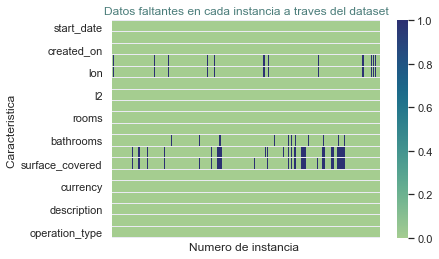

In [8]:
#Distribución de los datos faltantes en el dataset
datos_faltantes=data_properaty.isnull()
sns.heatmap(datos_faltantes.T, xticklabels=False, cmap='crest')
plt.title('Datos faltantes en cada instancia a traves del dataset',color=ct)
plt.xlabel('Numero de instancia ')
plt.ylabel('Caracteristica ')
plt.show

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

El siguiente paso para conocer un dataset es verlo graficamente, tener la posibilidad de visualizarlo nos da un entendimiento preliminar de la relacion que existe entre las variables y de la distribucion de cada una de las caracteristicas, ademas ayuda a encontrar datos anomalos y da pistas de los variables que debemos relacionar para encontrar algun tipo de información objetivo.No obsante hay unas columnas que no nos entregan informacion grafica como por ejemplo start_date, end_date	created_on, entre otras, para evitar gasto computacional innecesario vamos a crear un dataframe con solo las columnas que creamos beneficiosas.

In [9]:
 #veamos el dataset agrupado por tipo de propiedad
print('Instancias por tipo de propiedad \n')
print(data_properaty['property_type'].value_counts())

Instancias por tipo de propiedad 

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


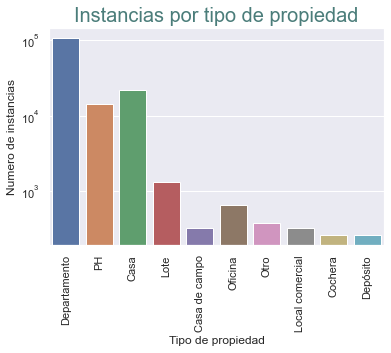

In [10]:
sns.countplot(data = data_properaty, x = 'property_type')
plt.title('Instancias por tipo de propiedad',fontsize=tt,color=ct)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.xlabel("Tipo de propiedad")
plt.ylabel("Numero de instancias")
plt.show()


En la anterior gráfica podemos observar que hay una diferencia notoria entre los tipos de propiedad; Departamento, PH y casa y los demás,ademas podemos apreciar la cantidad exacta de instancias que hay para cada una de ellas. En ocasiones es mejor seccionar el dataset escogiendo solo algunos tipos de caracteristicas, con el fin de obtener modelos mas sencillos y predictivos por ello nos quedaremnos con solo los primeras tres tipos de propiedades 

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [11]:
print('PUBLICACIONES POR REGIONES \n')
print(data_properaty['l2'].value_counts())
print('----------------------------------------')

print('PUBLICACIONES POR ZONAS \n')
print(data_properaty['l3'].value_counts())

PUBLICACIONES POR REGIONES 

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64
----------------------------------------
PUBLICACIONES POR ZONAS 

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


Text(0, 0.5, 'Numero de registros')

<Figure size 432x288 with 0 Axes>

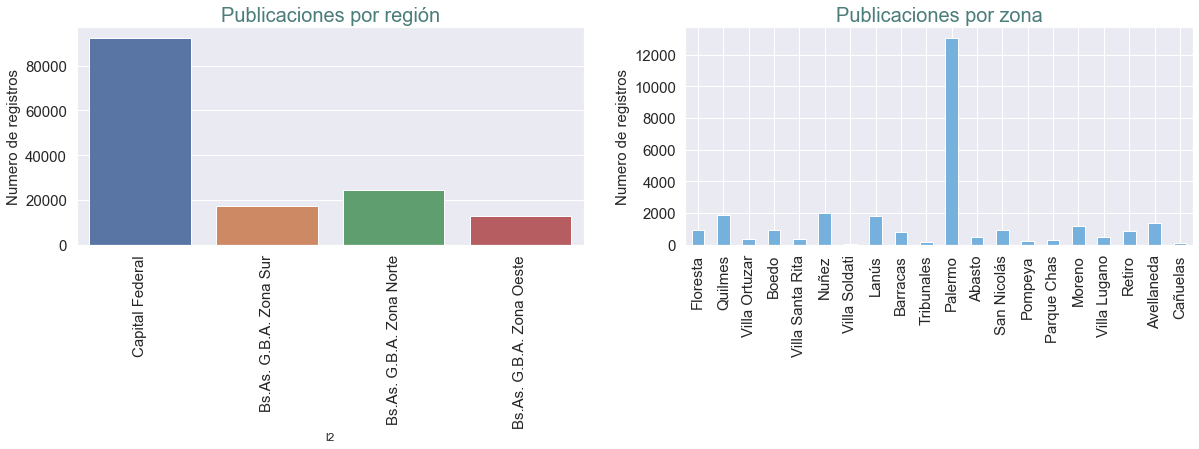

In [12]:
plt.figure()
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data = data_properaty, x = 'l2')
plt.title('Publicaciones por región',fontsize=tt,color=ct)
plt.ylabel('Numero de registros',fontsize=te)
plt.xticks(rotation = 90,fontsize=te)
plt.yticks(fontsize=15)
#grafica 2
plt.subplot(1,2,2)
data_properaty['l3'].value_counts().sample(20).plot(kind='bar',color=cg)
plt.xticks(fontsize=te)
plt.yticks(fontsize=te)
plt.title('Publicaciones por zona',fontsize=tt,color=ct)
plt.ylabel('Numero de registros',fontsize=te)




Es lógico que existan mas registros en la capital por ser esta mas grande y tener mas viviendas, por otra parte en la grafica de la derecha se muestran solo 20 barrios al azar para dar una mejor visualizacion.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [13]:
#mascaras para filtrar las tres mejores propiedades
mascara_1=data_properaty['l2']=='Capital Federal'
mascara_2=data_properaty['property_type']=='Departamento'
mascara_3=data_properaty['property_type']=='PH'
mascara_4=data_properaty['property_type']=='Casa'
data_filtrada=data_properaty[mascara_1]
data_filtrada=data_filtrada.loc[mascara_2|mascara_3|mascara_4]
display(HTML('<h2>Datos Filtrados</h2>'))
display_html(data_filtrada)




start_date 
 end_date 
 created_on 
 lat 
 lon 
 l1 
 l2 
 l3 
 rooms 
 bedrooms 
 bathrooms 
 surface_total 
 surface_covered 
 price 
 currency 
 title 
 description 
 property_type 
 operation_type 
 
 
 
 
 0 
 2019-10-17 
 2019-12-23 
 2019-10-17 
 -34.605880 
 -58.384949 
 Argentina 
 Capital Federal 
 San Cristobal 
 7.0 
 7.0 
 2.0 
 140.0 
 140.0 
 153000.0 
 USD 
 ***Venta semipiso centro, ideal hostel***** 
 DESCRIPCION DE LA PROPIEDAD: Departamento de 1... 
 Departamento 
 Venta 
 
 
 1 
 2019-10-17 
 2019-11-21 
 2019-10-17 
 -34.624056 
 -58.412110 
 Argentina 
 Capital Federal 
 Boedo 
 2.0 
 1.0 
 2.0 
 70.0 
 58.0 
 159000.0 
 USD 
 Espectacular PH reciclado en Boedo sin expensas. 
 PH reciclado en Boedo a una cuadra de la plaz... 
 PH 
 Venta 
 
 
 2 
 2019-10-17 
 2019-11-01 
 2019-10-17 
 -34.593569 
 -58.427474 
 Argentina 
 Capital Federal 
 Palermo 
 2.0 
 1.0 
 1.0 
 45.0 
 45.0 
 125000.0 
 USD 
 Depto.tipo casa de 2 ambientes en Venta en Pal... 
 2 ambienets amplio , excelente estado , patio ... 
 PH 
 Venta 
 
 
 3 
 2019-10-17 
 2019-12-23 
 2019-10-17 
 -34.581294 
 -58.436754 
 Argentina 
 Capital Federal 
 Palermo 
 2.0 
 1.0 
 1.0 
 85.0 
 50.0 
 295000.0 
 USD 
 COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH... 
 HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE... 
 PH 
 Venta 
 
 
 5 
 2019-10-17 
 2019-11-01 
 2019-10-17 
 -34.593779 
 -58.441239 
 Argentina 
 Capital Federal 
 Villa Crespo 
 2.0 
 1.0 
 1.0 
 56.0 
 56.0 
 150000.0 
 USD 
 Depto.tipo casa de 2 ambientes en Venta en Vil... 
 Excelente ph solo 2 unidades, no paga expensas... 
 PH 
 Venta 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 146554 
 2019-07-31 
 2019-08-14 
 2019-07-31 
 -34.585355 
 -58.427194 
 Argentina 
 Capital Federal 
 Palermo 
 4.0 
 3.0 
 3.0 
 175.0 
 111.0 
 570000.0 
 USD 
 Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa... 
 Espectacular Ph 4 Ambientes de excelente calid... 
 PH 
 Venta 
 
 
 146555 
 2019-07-31 
 2019-08-14 
 2019-07-31 
 -34.585355 
 -58.427194 
 Argentina 
 Capital Federal 
 Palermo 
 3.0 
 2.0 
 2.0 
 144.0 
 134.0 
 480000.0 
 USD 
 PH Reciclado a nuevo en pleno Palermo Hollywood! 
 Espectacular Ph 3 Ambientes de excelente calid... 
 PH 
 Venta 
 
 
 146556 
 2019-07-31 
 2020-01-17 
 2019-07-31 
 -34.584134 
 -58.436389 
 Argentina 
 Capital Federal 
 Palermo 
 4.0 
 2.0 
 2.0 
 317.0 
 143.0 
 530000.0 
 USD 
 Hermoso PH reciclado - 4 ambientes + Pileta + ... 
 Hermoso PH reciclado en Palermo, 143 m2 cubier... 
 PH 
 Venta 
 
 
 146557 
 2019-07-31 
 2019-08-23 
 2019-07-31 
 -34.583995 
 -58.417645 
 Argentina 
 Capital Federal 
 Palermo 
 3.0 
 2.0 
 2.0 
 145.0 
 145.0 
 420000.0 
 USD 
 Venta. Departamento. 3 Ambientes. 145m². Ampli... 
 CARACTERÍSTICAS- Ambientes: 3.- Superficie tot... 
 Departamento 
 Venta 
 
 
 146558 
 2019-07-31 
 2020-01-17 
 2019-07-31 
 NaN 
 NaN 
 Argentina 
 Capital Federal 
 Palermo 
 4.0 
 3.0 
 5.0 
 220.0 
 210.0 
 1470000.0 
 USD 
 TORRE DECO SEGUI ESPECTACULAR UNIDAD DE 4 AMB ... 
 EXCLUSIVO Torre Deco Seguí Oportunidad de Inve... 
 Departamento 
 Venta 
 
 
 
 91485 rows × 19 columns

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

Las medidas de tendencia central son algunos estadísticos que nos ayudan a ver la distribucion de los datos. Estadísticos como promedio, desviación estandar y los cuartiles nos ayudan a enfocar toda la informacion en unos pocos valores con el fin de entender sus rangos y la forma en que se comportan las mediciones. A continuacion veremos algunos de estos estadísticos para   las caracteristicas de mayor relevancia en el dataset.

## Valores Faltantes 

Algunas columnas tienen valores faltantes, sin embargo eliminar filas por valores faltantes puede llevar a perdida de información valiosa de otras caracteristicas, por esta razon una forma no sesgada de llenar los valores faltantes es mediante el promedio de la columna. No obstante hacer esto sin eliminar valores atipicos puede llevar a resultados erroneos en el promedio, para nuestro caso los llenaremos con el valor del 2 cuartil, pues este valor representa un valor central sin tener en cuenta outliers.

In [14]:
#Dataset con las caracteristicas relevantes  
data_properaty=data_filtrada[['rooms', 'bedrooms','bathrooms','l2','l3', 'surface_total', 'surface_covered', 'price','property_type']]

In [15]:
data_properaty.isna().sum()

rooms                 0
bedrooms              0
bathrooms          2171
l2                    0
l3                    0
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64

In [16]:
data_properaty_gr= data_properaty.copy()
data_properaty_gr.fillna(data_properaty_gr.quantile(0.5),inplace = True)
data_properaty_gr.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
l2                 0
l3                 0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 property_type 
 
 
 
 
 
 
 
 
 
 
 
 
 Casa 
 2692.0 
 397556.942422 
 286946.289947 
 30000.0 
 240000.0 
 330000.0 
 480000.0 
 5000000.0 
 
 
 Departamento 
 79029.0 
 259775.596060 
 338968.282803 
 6000.0 
 119000.0 
 170000.0 
 269000.0 
 32434232.0 
 
 
 PH 
 9764.0 
 219208.547214 
 116302.514661 
 27000.0 
 135000.0 
 191500.0 
 270000.0 
 1750000.0

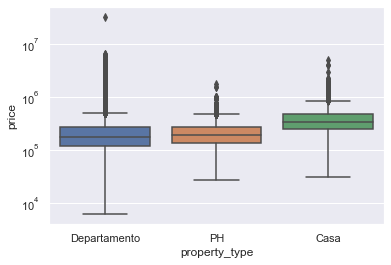

In [17]:
sns.boxplot(data = data_properaty_gr, x = 'property_type', y = 'price')
plt.yscale('log')
estadisticos=data_properaty_gr.groupby(['property_type']).price.describe()
display(HTML('<h2>Estadisticos para precio por propiedad</h2>'))
display_html(estadisticos)

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 property_type 
 
 
 
 
 
 
 
 
 
 
 
 
 Casa 
 2692.0 
 4.914190 
 1.838235 
 1.0 
 4.0 
 5.0 
 6.0 
 26.0 
 
 
 Departamento 
 79029.0 
 2.814600 
 1.201029 
 1.0 
 2.0 
 3.0 
 4.0 
 21.0 
 
 
 PH 
 9764.0 
 3.638161 
 1.380147 
 1.0 
 3.0 
 3.0 
 4.0 
 16.0

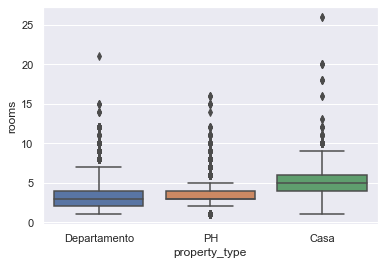

In [18]:
sns.boxplot(data = data_properaty_gr, x = 'property_type', y = 'rooms')
estadisticos=data_properaty_gr.groupby(['property_type']).rooms.describe()
display(HTML('<h2>Estadisticos para rooms por propiedad</h2>'))
display_html(estadisticos)

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 property_type 
 
 
 
 
 
 
 
 
 
 
 
 
 Casa 
 2692.0 
 2.294205 
 1.167023 
 1.0 
 1.0 
 2.0 
 3.0 
 10.0 
 
 
 Departamento 
 79029.0 
 1.520252 
 0.837848 
 1.0 
 1.0 
 1.0 
 2.0 
 14.0 
 
 
 PH 
 9764.0 
 1.556125 
 0.788258 
 1.0 
 1.0 
 1.0 
 2.0 
 11.0

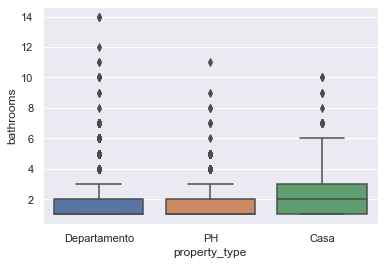

In [19]:
sns.boxplot(data = data_properaty_gr, x = 'property_type', y = 'bathrooms')
estadisticos=data_properaty_gr.groupby(['property_type']).bathrooms.describe()
display(HTML('<h2>Estadisticos para bathrooms por propiedad</h2>'))
display_html(estadisticos)

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 property_type 
 
 
 
 
 
 
 
 
 
 
 
 
 Casa 
 2692.0 
 3.481798 
 1.355187 
 0.0 
 3.0 
 3.0 
 4.0 
 15.0 
 
 
 Departamento 
 79029.0 
 1.836946 
 0.972290 
 0.0 
 1.0 
 2.0 
 2.0 
 15.0 
 
 
 PH 
 9764.0 
 2.539021 
 1.237956 
 0.0 
 2.0 
 2.0 
 3.0 
 15.0

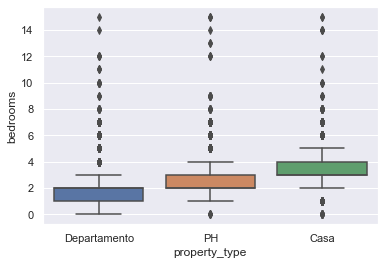

In [20]:
sns.boxplot(data = data_properaty_gr, x = 'property_type', y = 'bedrooms')
estadisticos=data_properaty_gr.groupby(['property_type']).bedrooms.describe()
display(HTML('<h2>Estadisticos para bedrooms por propiedad</h2>'))
display_html(estadisticos)

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 property_type 
 
 
 
 
 
 
 
 
 
 
 
 
 Casa 
 2692.0 
 194.017831 
 369.982564 
 25.0 
 91.0 
 157.0 
 240.0 
 17220.0 
 
 
 Departamento 
 79029.0 
 83.500740 
 468.909815 
 1.0 
 45.0 
 63.0 
 82.0 
 104890.0 
 
 
 PH 
 9764.0 
 130.224088 
 1812.294489 
 1.0 
 58.0 
 84.0 
 122.0 
 126062.0

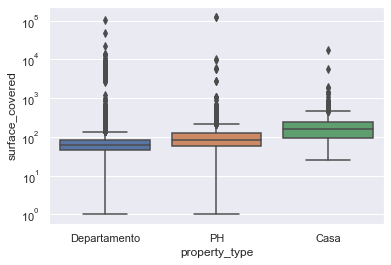

In [21]:
sns.boxplot(data = data_properaty_gr, x = 'property_type', y = 'surface_covered')
plt.yscale('log')
estadisticos=data_properaty_gr.groupby(['property_type']).surface_covered.describe()
display(HTML('<h2>Estadisticos para superficie cubierta por propiedad</h2>'))
display_html(estadisticos)

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 property_type 
 
 
 
 
 
 
 
 
 
 
 
 
 Casa 
 2692.0 
 243.380386 
 330.152312 
 25.0 
 123.0 
 200.0 
 304.0 
 13250.0 
 
 
 Departamento 
 79029.0 
 95.657126 
 622.110477 
 10.0 
 49.0 
 71.0 
 93.0 
 108960.0 
 
 
 PH 
 9764.0 
 175.908849 
 2227.499378 
 10.0 
 70.0 
 105.0 
 152.0 
 126062.0

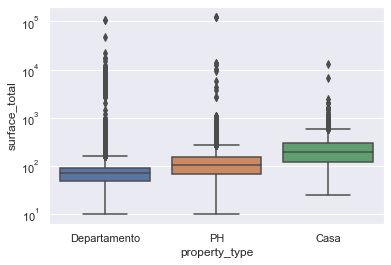

In [22]:
sns.boxplot(data = data_properaty_gr, x = 'property_type', y = 'surface_total')
plt.yscale('log')
estadisticos=data_properaty_gr.groupby(['property_type']).surface_total.describe()
display(HTML('<h2>Estadisticos para superficie total por propiedad</h2>'))
display_html(estadisticos)

En las anteriores graficas de boxplot se puede observar que el criterio superior para definir los outliers es distinto para los tipos  de propiedades lo cual puede llevar a quitar datos importantes de alguna de ellas; si se sigue un unico criterio.Ademas acorde a la caja es evidente tambien que las distribuciones son distintas, especialmente para la propiedad casa donde sus medianas se encuentran  casi al doble de la de departamento y ph endistintas caracteristicas.Por ello se realizará un analisis  y eliminacion de outliers para cada una de ellas.

## Eliminación de outliers

En el analisis exploratorio de datos se comprobo que los datos seguian una distribucion normal por esta razon es posible detectar los outliers siguiendo la regla de los 3 sigmas o la del rango intercuartilico, haremos esto para cada una de las porpiedades en cada uno de los atributos. 


In [23]:
def outliers(tipo_propiedad,data):
    mascara=data['property_type']==tipo_propiedad
    data_properaty_propiedad=data[mascara]
    columnas=data_properaty_gr.columns.drop(['l2','l3','property_type'])
    limites=[]
    for item in range(len(columnas)):
        cuartil_1=data_properaty_propiedad[columnas[item]].quantile(0.25)
        cuartil_3=data_properaty_propiedad[columnas[item]].quantile(0.75)
        IQR=cuartil_3-cuartil_1
        limite=cuartil_3+1.5*IQR
        limites.append(limite)
        print("El limite de {}, para {} definido es {}".format(columnas[item],tipo_propiedad,limites[item]))
    return limites

In [24]:
limites_dto=outliers('Departamento', data_properaty_gr)

El limite de rooms, para Departamento definido es 7.0
El limite de bedrooms, para Departamento definido es 3.5
El limite de bathrooms, para Departamento definido es 3.5
El limite de surface_total, para Departamento definido es 159.0
El limite de surface_covered, para Departamento definido es 137.5
El limite de price, para Departamento definido es 494000.0


In [25]:
limites_casa=outliers('Casa', data_properaty_gr)

El limite de rooms, para Casa definido es 9.0
El limite de bedrooms, para Casa definido es 5.5
El limite de bathrooms, para Casa definido es 6.0
El limite de surface_total, para Casa definido es 575.5
El limite de surface_covered, para Casa definido es 463.5
El limite de price, para Casa definido es 840000.0


In [26]:
limites_ph=outliers('PH', data_properaty_gr)

El limite de rooms, para PH definido es 5.5
El limite de bedrooms, para PH definido es 4.5
El limite de bathrooms, para PH definido es 3.5
El limite de surface_total, para PH definido es 275.0
El limite de surface_covered, para PH definido es 218.0
El limite de price, para PH definido es 472500.0


In [27]:
def eliminacion(tipo_propiedad,limites,data):
    mascara=data['property_type']==tipo_propiedad
    data_properaty_propiedad=data[mascara]
    mascara_1= data_properaty_propiedad['rooms']<limites[0]
    mascara_2= data_properaty_propiedad['bedrooms']<limites[1]
    mascara_3= data_properaty_propiedad['bathrooms']<limites[2]
    mascara_4= data_properaty_propiedad['surface_total']<limites[3]
    mascara_5= data_properaty_propiedad['surface_covered']<limites[4]
    mascara_6= data_properaty_propiedad['price']<limites[5]
    nueva_data=data_properaty_propiedad.loc[mascara_1&mascara_2&mascara_3&mascara_4&mascara_5]
    display(HTML('<h2>Dataset limpiado</h2>'))
    display_html(nueva_data)
    return nueva_data

    
    

In [28]:
data_clear_dpto=eliminacion('Departamento',limites_dto,data_properaty_gr)

rooms 
 bedrooms 
 bathrooms 
 l2 
 l3 
 surface_total 
 surface_covered 
 price 
 property_type 
 
 
 
 
 11 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Boedo 
 68.0 
 59.0 
 149000.0 
 Departamento 
 
 
 12 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Boedo 
 50.0 
 44.0 
 115000.0 
 Departamento 
 
 
 20 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Abasto 
 31.0 
 31.0 
 75000.0 
 Departamento 
 
 
 21 
 1.0 
 1.0 
 1.0 
 Capital Federal 
 Abasto 
 22.0 
 22.0 
 48000.0 
 Departamento 
 
 
 22 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Flores 
 45.0 
 45.0 
 95000.0 
 Departamento 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 146546 
 3.0 
 2.0 
 2.0 
 Capital Federal 
 Palermo 
 89.0 
 82.0 
 434999.0 
 Departamento 
 
 
 146547 
 3.0 
 2.0 
 2.0 
 Capital Federal 
 Palermo 
 82.0 
 82.0 
 585000.0 
 Departamento 
 
 
 146548 
 3.0 
 2.0 
 2.0 
 Capital Federal 
 Palermo 
 82.0 
 82.0 
 475000.0 
 Departamento 
 
 
 146551 
 4.0 
 3.0 
 2.0 
 Capital Federal 
 Palermo 
 103.0 
 98.0 
 660000.0 
 Departamento 
 
 
 146553 
 4.0 
 3.0 
 2.0 
 Capital Federal 
 Palermo 
 106.0 
 100.0 
 620000.0 
 Departamento 
 
 
 
 69393 rows × 9 columns

In [29]:
data_clear_casa=eliminacion('Casa',limites_casa,data_properaty_gr)

rooms 
 bedrooms 
 bathrooms 
 l2 
 l3 
 surface_total 
 surface_covered 
 price 
 property_type 
 
 
 
 
 336 
 3.0 
 1.0 
 2.0 
 Capital Federal 
 San Cristobal 
 116.0 
 116.0 
 290000.0 
 Casa 
 
 
 384 
 3.0 
 2.0 
 1.0 
 Capital Federal 
 Mataderos 
 171.0 
 120.0 
 179900.0 
 Casa 
 
 
 385 
 3.0 
 2.0 
 1.0 
 Capital Federal 
 Villa Pueyrredón 
 71.0 
 68.0 
 174000.0 
 Casa 
 
 
 446 
 5.0 
 4.0 
 3.0 
 Capital Federal 
 Villa Santa Rita 
 230.0 
 244.0 
 490000.0 
 Casa 
 
 
 454 
 6.0 
 5.0 
 1.0 
 Capital Federal 
 Parque Avellaneda 
 210.0 
 189.0 
 225000.0 
 Casa 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 145557 
 4.0 
 3.0 
 2.0 
 Capital Federal 
 Mataderos 
 205.0 
 125.0 
 175000.0 
 Casa 
 
 
 145608 
 6.0 
 4.0 
 3.0 
 Capital Federal 
 Belgrano 
 71.0 
 250.0 
 550000.0 
 Casa 
 
 
 145609 
 5.0 
 4.0 
 4.0 
 Capital Federal 
 Belgrano 
 71.0 
 63.0 
 1100000.0 
 Casa 
 
 
 145610 
 4.0 
 4.0 
 1.0 
 Capital Federal 
 Colegiales 
 162.0 
 63.0 
 395000.0 
 Casa 
 
 
 145615 
 5.0 
 4.0 
 2.0 
 Capital Federal 
 Villa Crespo 
 200.0 
 150.0 
 300000.0 
 Casa 
 
 
 
 2406 rows × 9 columns

In [30]:
data_clear_PH=eliminacion('PH',limites_ph,data_properaty_gr)

rooms 
 bedrooms 
 bathrooms 
 l2 
 l3 
 surface_total 
 surface_covered 
 price 
 property_type 
 
 
 
 
 1 
 2.0 
 1.0 
 2.0 
 Capital Federal 
 Boedo 
 70.0 
 58.0 
 159000.0 
 PH 
 
 
 2 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Palermo 
 45.0 
 45.0 
 125000.0 
 PH 
 
 
 3 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Palermo 
 85.0 
 50.0 
 295000.0 
 PH 
 
 
 5 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Villa Crespo 
 56.0 
 56.0 
 150000.0 
 PH 
 
 
 6 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Villa Crespo 
 70.0 
 70.0 
 159500.0 
 PH 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 146441 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Palermo 
 40.0 
 40.0 
 130000.0 
 PH 
 
 
 146549 
 3.0 
 2.0 
 1.0 
 Capital Federal 
 Palermo 
 84.0 
 84.0 
 178000.0 
 PH 
 
 
 146550 
 5.0 
 2.0 
 2.0 
 Capital Federal 
 Palermo 
 114.0 
 95.0 
 298000.0 
 PH 
 
 
 146554 
 4.0 
 3.0 
 3.0 
 Capital Federal 
 Palermo 
 175.0 
 111.0 
 570000.0 
 PH 
 
 
 146555 
 3.0 
 2.0 
 2.0 
 Capital Federal 
 Palermo 
 144.0 
 134.0 
 480000.0 
 PH 
 
 
 
 8464 rows × 9 columns

Una vez limpiadas de outliers las propiedades verificamos la limpieza con los estadisticos

In [31]:
estadisticos_casa=data_clear_casa.describe()
display(HTML('<h2>Estadisticos para data limpiada Casa</h2>'))
display_html(estadisticos_casa)

rooms 
 bedrooms 
 bathrooms 
 surface_total 
 surface_covered 
 price 
 
 
 
 
 count 
 2406.000000 
 2406.000000 
 2406.00000 
 2406.000000 
 2406.000000 
 2.406000e+03 
 
 
 mean 
 4.569825 
 3.220283 
 2.12552 
 209.225686 
 163.747298 
 3.648752e+05 
 
 
 std 
 1.190707 
 0.916753 
 0.94947 
 117.627232 
 89.667203 
 2.049276e+05 
 
 
 min 
 1.000000 
 0.000000 
 1.00000 
 25.000000 
 25.000000 
 3.000000e+04 
 
 
 25% 
 4.000000 
 3.000000 
 1.00000 
 117.000000 
 87.000000 
 2.300000e+05 
 
 
 50% 
 4.000000 
 3.000000 
 2.00000 
 190.000000 
 150.000000 
 3.200000e+05 
 
 
 75% 
 5.000000 
 4.000000 
 3.00000 
 282.250000 
 215.000000 
 4.480000e+05 
 
 
 max 
 8.000000 
 5.000000 
 5.00000 
 570.000000 
 460.000000 
 1.890000e+06

In [32]:
estadisticos_dto=data_clear_dpto.describe()
display(HTML('<h2>Estadisticos para data limpiada Dto</h2>'))
display_html(estadisticos_dto)

rooms 
 bedrooms 
 bathrooms 
 surface_total 
 surface_covered 
 price 
 
 
 
 
 count 
 69393.000000 
 69393.000000 
 69393.000000 
 69393.000000 
 69393.000000 
 6.939300e+04 
 
 
 mean 
 2.556151 
 1.632456 
 1.329125 
 67.242805 
 60.408283 
 1.882023e+05 
 
 
 std 
 0.929010 
 0.781760 
 0.560653 
 26.195830 
 23.036157 
 1.209506e+05 
 
 
 min 
 1.000000 
 0.000000 
 1.000000 
 10.000000 
 1.000000 
 7.500000e+03 
 
 
 25% 
 2.000000 
 1.000000 
 1.000000 
 47.000000 
 43.000000 
 1.139750e+05 
 
 
 50% 
 3.000000 
 2.000000 
 1.000000 
 66.000000 
 59.000000 
 1.580000e+05 
 
 
 75% 
 3.000000 
 2.000000 
 2.000000 
 80.000000 
 70.000000 
 2.293500e+05 
 
 
 max 
 6.000000 
 3.000000 
 3.000000 
 158.000000 
 137.000000 
 4.144561e+06

In [33]:
estadisticos_PH=data_clear_PH.describe()
display(HTML('<h2>Estadisticos para data limpiada PH</h2>'))
display_html(estadisticos_PH)

rooms 
 bedrooms 
 bathrooms 
 surface_total 
 surface_covered 
 price 
 
 
 
 
 count 
 8464.000000 
 8464.000000 
 8464.000000 
 8464.000000 
 8464.000000 
 8464.000000 
 
 
 mean 
 3.313563 
 2.265714 
 1.421668 
 104.518077 
 83.966919 
 198554.699315 
 
 
 std 
 0.947506 
 0.886799 
 0.590210 
 49.385733 
 36.719494 
 93573.735580 
 
 
 min 
 1.000000 
 0.000000 
 1.000000 
 10.000000 
 1.000000 
 27000.000000 
 
 
 25% 
 3.000000 
 2.000000 
 1.000000 
 65.000000 
 55.000000 
 130000.000000 
 
 
 50% 
 3.000000 
 2.000000 
 1.000000 
 96.000000 
 77.000000 
 175000.000000 
 
 
 75% 
 4.000000 
 3.000000 
 2.000000 
 132.000000 
 107.000000 
 250000.000000 
 
 
 max 
 5.000000 
 4.000000 
 3.000000 
 273.000000 
 217.000000 
 1000000.000000

Una vez limpiados los datasets, procedemos a unirlos para realizar un encoding y manejar un solo dataset.

In [34]:
data_temporal=pd.concat([data_clear_dpto,data_clear_casa])
data_limpiada=pd.concat([data_temporal,data_clear_PH])
data_limpiada.property_type.unique() 

array(['Departamento', 'Casa', 'PH'], dtype=object)

## Encoding 

Para el encoding lo primero que debemos conocer es que tipo de variable categorica vamos a utilizar, de esta menera sabremos si realizar un encoding dummy o numerico secuencial. Para nuestro caso la variabvle sera tipo de Propiedad. Esta es una variable de tipo nominal y por ello realizaremos un encoding tipo dummy.La razón de elegir esta variable es el comportamiento distinto del precio a cada uno de los valores de esta, por lo que podria ser una buena variable de predicción a ser usada.

In [35]:
data_dummies = pd.get_dummies(data_limpiada,columns=['property_type'],prefix=['Propiedad'])
display(HTML('<h2>Data Dummies</h2>'))
display_html(data_dummies)

rooms 
 bedrooms 
 bathrooms 
 l2 
 l3 
 surface_total 
 surface_covered 
 price 
 Propiedad_Casa 
 Propiedad_Departamento 
 Propiedad_PH 
 
 
 
 
 11 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Boedo 
 68.0 
 59.0 
 149000.0 
 0 
 1 
 0 
 
 
 12 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Boedo 
 50.0 
 44.0 
 115000.0 
 0 
 1 
 0 
 
 
 20 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Abasto 
 31.0 
 31.0 
 75000.0 
 0 
 1 
 0 
 
 
 21 
 1.0 
 1.0 
 1.0 
 Capital Federal 
 Abasto 
 22.0 
 22.0 
 48000.0 
 0 
 1 
 0 
 
 
 22 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Flores 
 45.0 
 45.0 
 95000.0 
 0 
 1 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 146441 
 2.0 
 1.0 
 1.0 
 Capital Federal 
 Palermo 
 40.0 
 40.0 
 130000.0 
 0 
 0 
 1 
 
 
 146549 
 3.0 
 2.0 
 1.0 
 Capital Federal 
 Palermo 
 84.0 
 84.0 
 178000.0 
 0 
 0 
 1 
 
 
 146550 
 5.0 
 2.0 
 2.0 
 Capital Federal 
 Palermo 
 114.0 
 95.0 
 298000.0 
 0 
 0 
 1 
 
 
 146554 
 4.0 
 3.0 
 3.0 
 Capital Federal 
 Palermo 
 175.0 
 111.0 
 570000.0 
 0 
 0 
 1 
 
 
 146555 
 3.0 
 2.0 
 2.0 
 Capital Federal 
 Palermo 
 144.0 
 134.0 
 480000.0 
 0 
 0 
 1 
 
 
 
 80263 rows × 11 columns

## Escalado de datos 

Existe una gran diferencia de escala entre las caracteristicas de los datos, por ejemplo, mientras caracteristicas como bedrooms o rooms van de 0 a un orden de magnitud, algunas como superficie total o superficie cubierta tiene hasta 3 ordenes de magnitud. Escalar los datos de ser posible normalizandolos ayudará a que los modelos tengan mejor desempeño y su costo computacional tambien sea mas bajo. Por ello escalaremos todas las caracteristicas que utilizaremos para predecir la variable precio.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columnas_escaladas=['rooms','bedrooms','bathrooms','surface_total','surface_covered']
def escalar_columnas(data,columnas):
    for col in columnas:
        data[col] = scaler.fit_transform(pd.DataFrame(data[col]))
    return data

In [37]:
data_escalada=escalar_columnas(data_dummies,columnas_escaladas)
display(HTML('<h2>Data Escalada</h2>'))
display_html(data_escalada)

rooms 
 bedrooms 
 bathrooms 
 l2 
 l3 
 surface_total 
 surface_covered 
 price 
 Propiedad_Casa 
 Propiedad_Departamento 
 Propiedad_PH 
 
 
 
 
 11 
 -0.681002 
 -0.867438 
 -0.609453 
 Capital Federal 
 Boedo 
 -0.168301 
 -0.202695 
 149000.0 
 0 
 1 
 0 
 
 
 12 
 -0.681002 
 -0.867438 
 -0.609453 
 Capital Federal 
 Boedo 
 -0.576044 
 -0.637640 
 115000.0 
 0 
 1 
 0 
 
 
 20 
 -0.681002 
 -0.867438 
 -0.609453 
 Capital Federal 
 Abasto 
 -1.006439 
 -1.014593 
 75000.0 
 0 
 1 
 0 
 
 
 21 
 -1.658911 
 -0.867438 
 -0.609453 
 Capital Federal 
 Abasto 
 -1.210310 
 -1.275560 
 48000.0 
 0 
 1 
 0 
 
 
 22 
 -0.681002 
 -0.867438 
 -0.609453 
 Capital Federal 
 Flores 
 -0.689306 
 -0.608644 
 95000.0 
 0 
 1 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 146441 
 -0.681002 
 -0.867438 
 -0.609453 
 Capital Federal 
 Palermo 
 -0.802568 
 -0.753625 
 130000.0 
 0 
 0 
 1 
 
 
 146549 
 0.296907 
 0.294052 
 -0.609453 
 Capital Federal 
 Palermo 
 0.194136 
 0.522214 
 178000.0 
 0 
 0 
 1 
 
 
 146550 
 2.252726 
 0.294052 
 1.070603 
 Capital Federal 
 Palermo 
 0.873707 
 0.841174 
 298000.0 
 0 
 0 
 1 
 
 
 146554 
 1.274816 
 1.455541 
 2.750659 
 Capital Federal 
 Palermo 
 2.255502 
 1.305115 
 570000.0 
 0 
 0 
 1 
 
 
 146555 
 0.296907 
 0.294052 
 1.070603 
 Capital Federal 
 Palermo 
 1.553278 
 1.972031 
 480000.0 
 0 
 0 
 1 
 
 
 
 80263 rows × 11 columns

## PCA 

Hacer un PCA con un dataset esclado puede llevar a errores pues estamos reduciendo la dimensionalidad con datos procesados, y no los origiunales por lo que los atributos que escojamos como representacion o salida del PCA, no representaran las cualidades de mi dataset. Sin embargo por cuestiones de nuestro aprendizaje y por tener mas posibilidades de ensayar con diferentes datasets distintamente procesados, realizaremos un PCA a dos atributos, con el fin tambien de ver el comportamiento de la variable precio respecto a estas.

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data=data_limpiada.drop(columns=['property_type','l2','l3','price'])
data_reducida=pd.DataFrame(pca.fit_transform(data))
    

In [39]:
data_reducida

0          1
0      -10.165081  -1.060801
1      -33.571349  -2.041504
2      -56.557874  -0.826488
3      -69.184523  -2.522198
4      -36.936454   1.789389
...           ...        ...
80258  -43.944104   0.855147
80259   17.746430   9.102427
80260   48.289231  -0.345701
80261  106.466796 -24.680790
80262   95.773195  12.379303

[80263 rows x 2 columns]

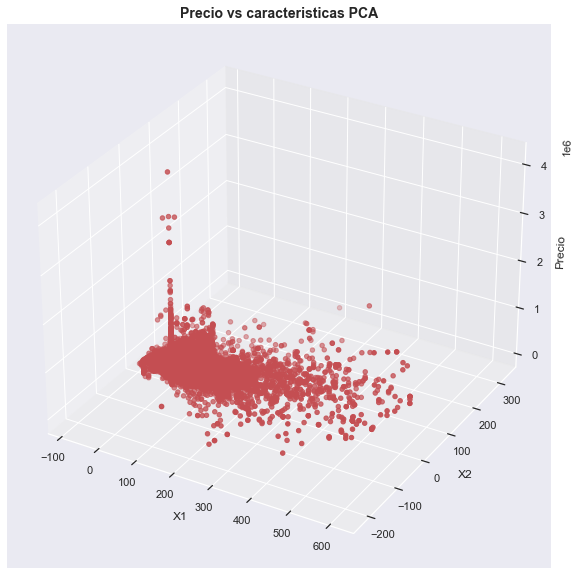

In [40]:
from mpl_toolkits.mplot3d import axes3d

fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Datos adicionales
x_1= data_reducida[0]
x_2 = data_reducida[1]
precio= data_limpiada['price']

ax.scatter(x_1, x_2, precio, c ='r', marker='o')
ax.set_title("Precio vs caracteristicas PCA",fontsize=14,fontweight="bold")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Precio")


plt.show()

En la grafica anteiror se puede ver algo de relacion lineal entre las caracteristicas del dataset y el precio, lo cual confirmaremos con un una matrix de correlacion.Esta relacion puede ayudarnos a obtener buenos resultados con una regresion lineal de bajo grado y por consiguiente de bajo costo computacional.

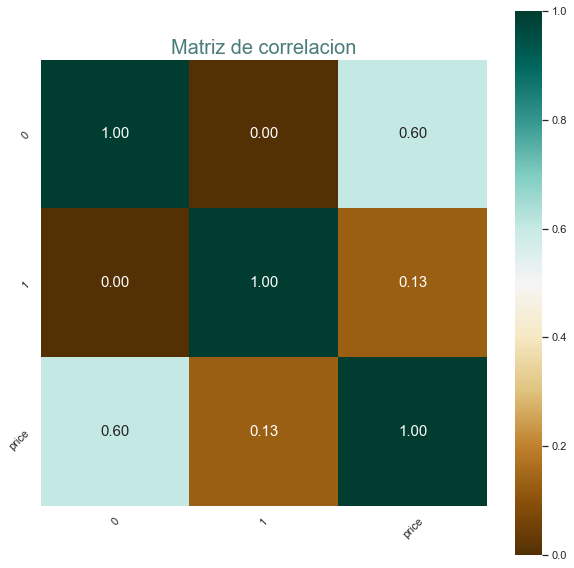

In [43]:
plt.figure(figsize=(10,10)) 
data=pd.concat([data_reducida,data_limpiada['price'].reset_index()['price']],axis=1)
correlacion=data.corr()
sns.heatmap(correlacion, cbar = True, square = True,  annot=True,fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= cm)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Matriz de correlacion',fontsize=20, color=ct)
plt.show()

Aqui comprobamos una medianamente aceptable correlacion lineal entre la variable 0 y el precio mientras que no existe correlacion entre la variable 2 y el precio.

## Modelos avanzados 

1.Como primer modelo haremos un random forest con baggin tomando como datos de entrada los datos escalados, nuestro objetivo es obtener un error menor al obtenido con arboles de decisión, del proyecto 1 y aplicaremos tecnicas de optimización de parametros.

2.Tambien experimentaremos con un SVM donde aplicaremos validacion cruzada y optimizacion de parametros tambien con el dataset escalado.



### Random Forest 

In [61]:
#variable a predecir precio 
data_modelo=data_escalada.copy()
columnas_eliminadas=['l2','l3','price']
X=data_modelo.drop(columns=columnas_eliminadas)
y=data_modelo['price']

In [62]:
#tain y test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestRegressor
#Como estamos aplicando bagging nos conviene sobreajustar cada arbol por eso colocamos none en max_depth
bosque = RandomForestRegressor(n_estimators=40,max_depth=15, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
bosque.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=40,
                      n_jobs=-1, oob_score=True, random_state=42)

In [64]:
#Evaluar el desempeño del modelo 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_pred = bosque.predict(X_train)
y_test_pred = bosque.predict(X_test)
print('El error para los datos de train es:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('El error para los datos de test es:',np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('El error r^2 es:', r2_score(y_test,y_test_pred))

El error para los datos de train es: 66271.907479787
El error para los datos de test es: 66050.10648482677
El error r^2 es: 0.7054492687110765


En el proyecto anterior se obtuvo un error de test de alrededor de 130000 con los modelos que se plantearon, con este random forest hemos disminuido el error mas de la mitad. Sin embargo se puede mejorar y para esto tendremos que buscar la combinacion perfecta de hiperparametros del bosque. 
Ademas se obtuvieron errores tanto en el train como en el test muy similares, lo cual es muestra de que el modelo no presenta ni sobreajuste ni bias.
A continuacion veremos como fue la distribucion de errores y en ella se nota que la mediana esta en cero tanto para ambos errores, o en otras palabras que el punto maximo de la campana se encuentra en cero, esto nos indoca que hubieron muchos datos a los cuales nuestro modelo dio una respuesta positiva y esto se evidencia en la grafica de la derecha con los puntos sobre la linea.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


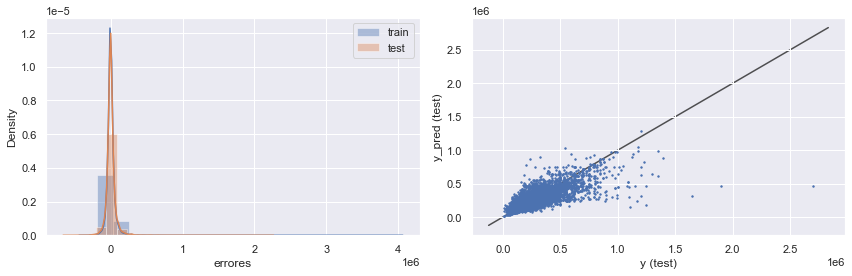

In [74]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


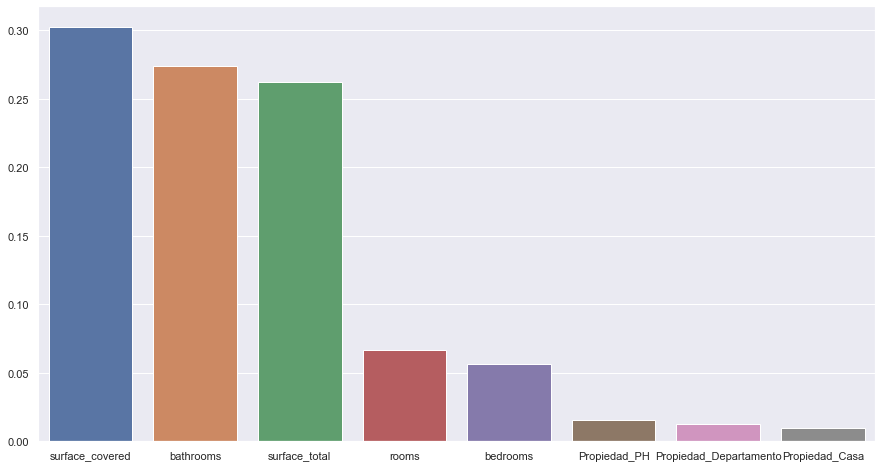

In [65]:
#Veamos la importancia de las caracteristicas en la respuesta de nuestro modelo.

importancias = bosque.feature_importances_
columns = X_train.columns
indices = np.argsort(importancias)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importancias[indices])
plt.show()

Como se sospechaba los datos que codificamos no nos son utiles para el problema de regresión, sin embargo mas adelante pueden servir cuando clostericemos y tengamos un problema de clasificación o no supervisado. Para la optimización de hiperparametros no seran tenidas en cuenta.
Ahora analicemos 5 arboles al azar para observar las caracteristicas del dataset con mas jerarquia en cada uno de ellos.

In [66]:
from sklearn import tree
import random
def esquema_arbol(numero_arbol):
    fn=X.columns.to_list()
    cn=['precio']
    with plt.style.context('grayscale'):
        fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=800)
        tree.plot_tree(bosque.estimators_[numero_arbol],
                   max_depth=2,
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   proportion=False)
        return plt.show()

Esquema para el arbol #: 1


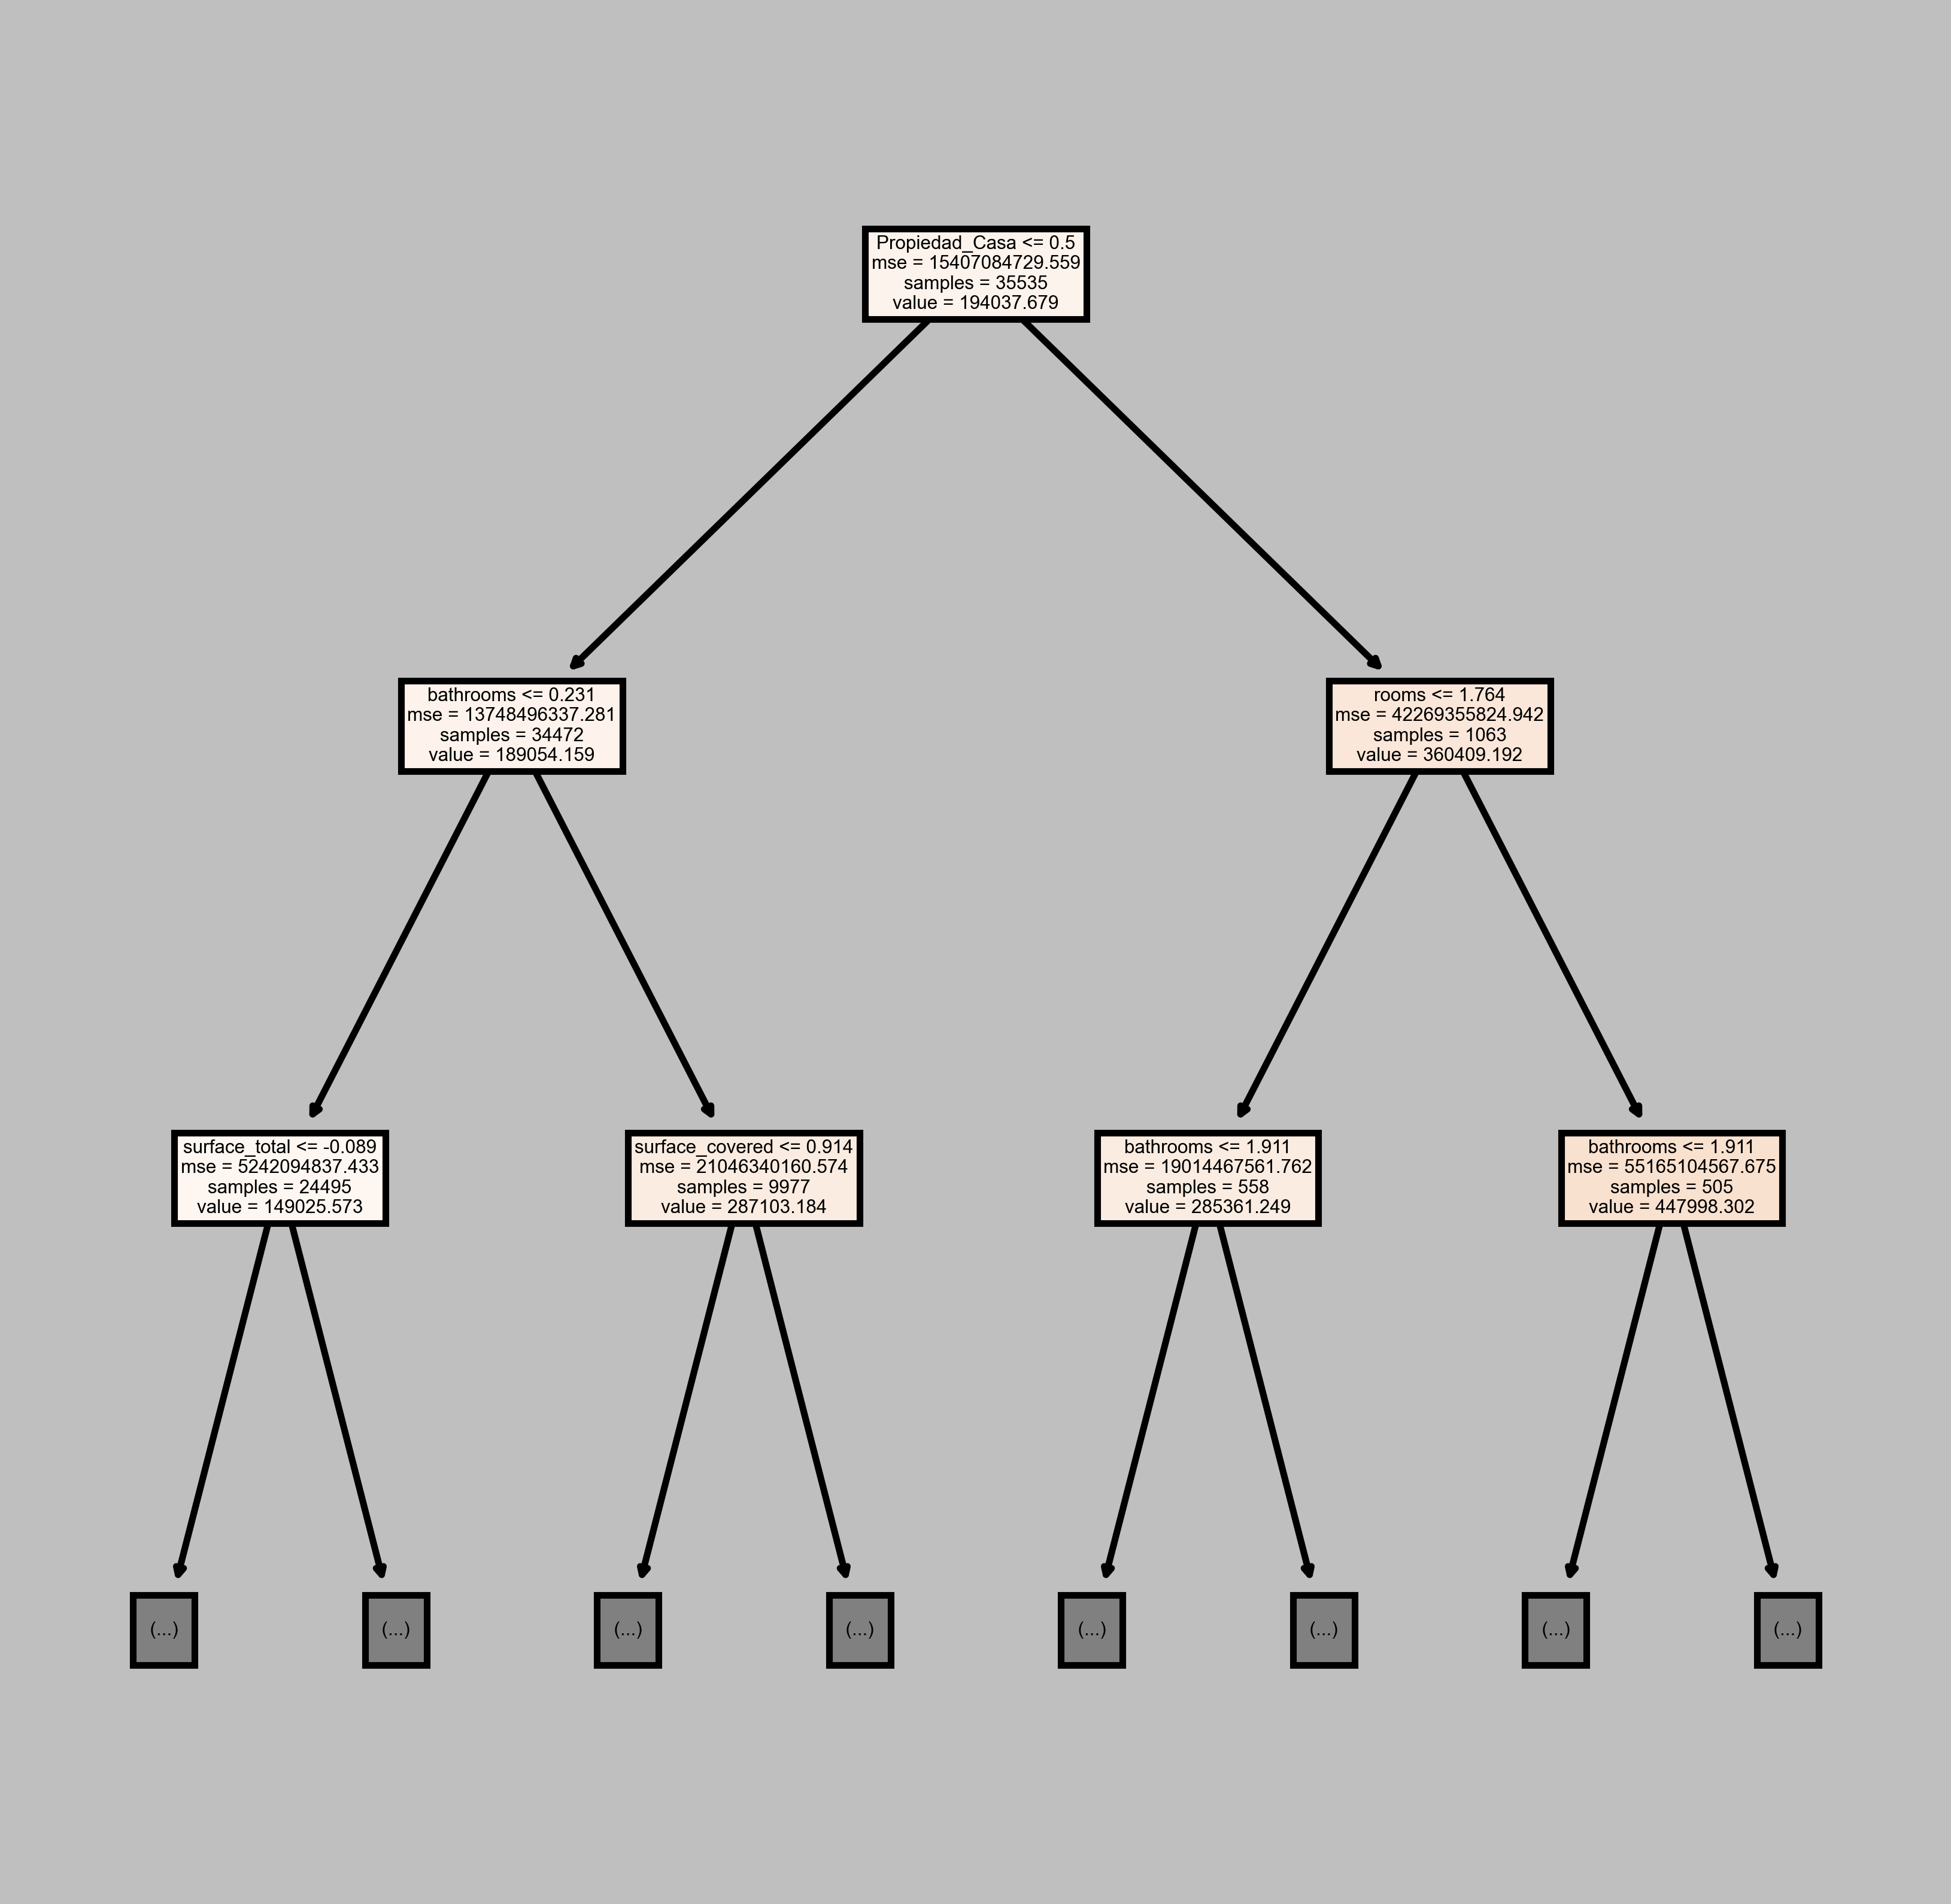

Esquema para el arbol #: 2


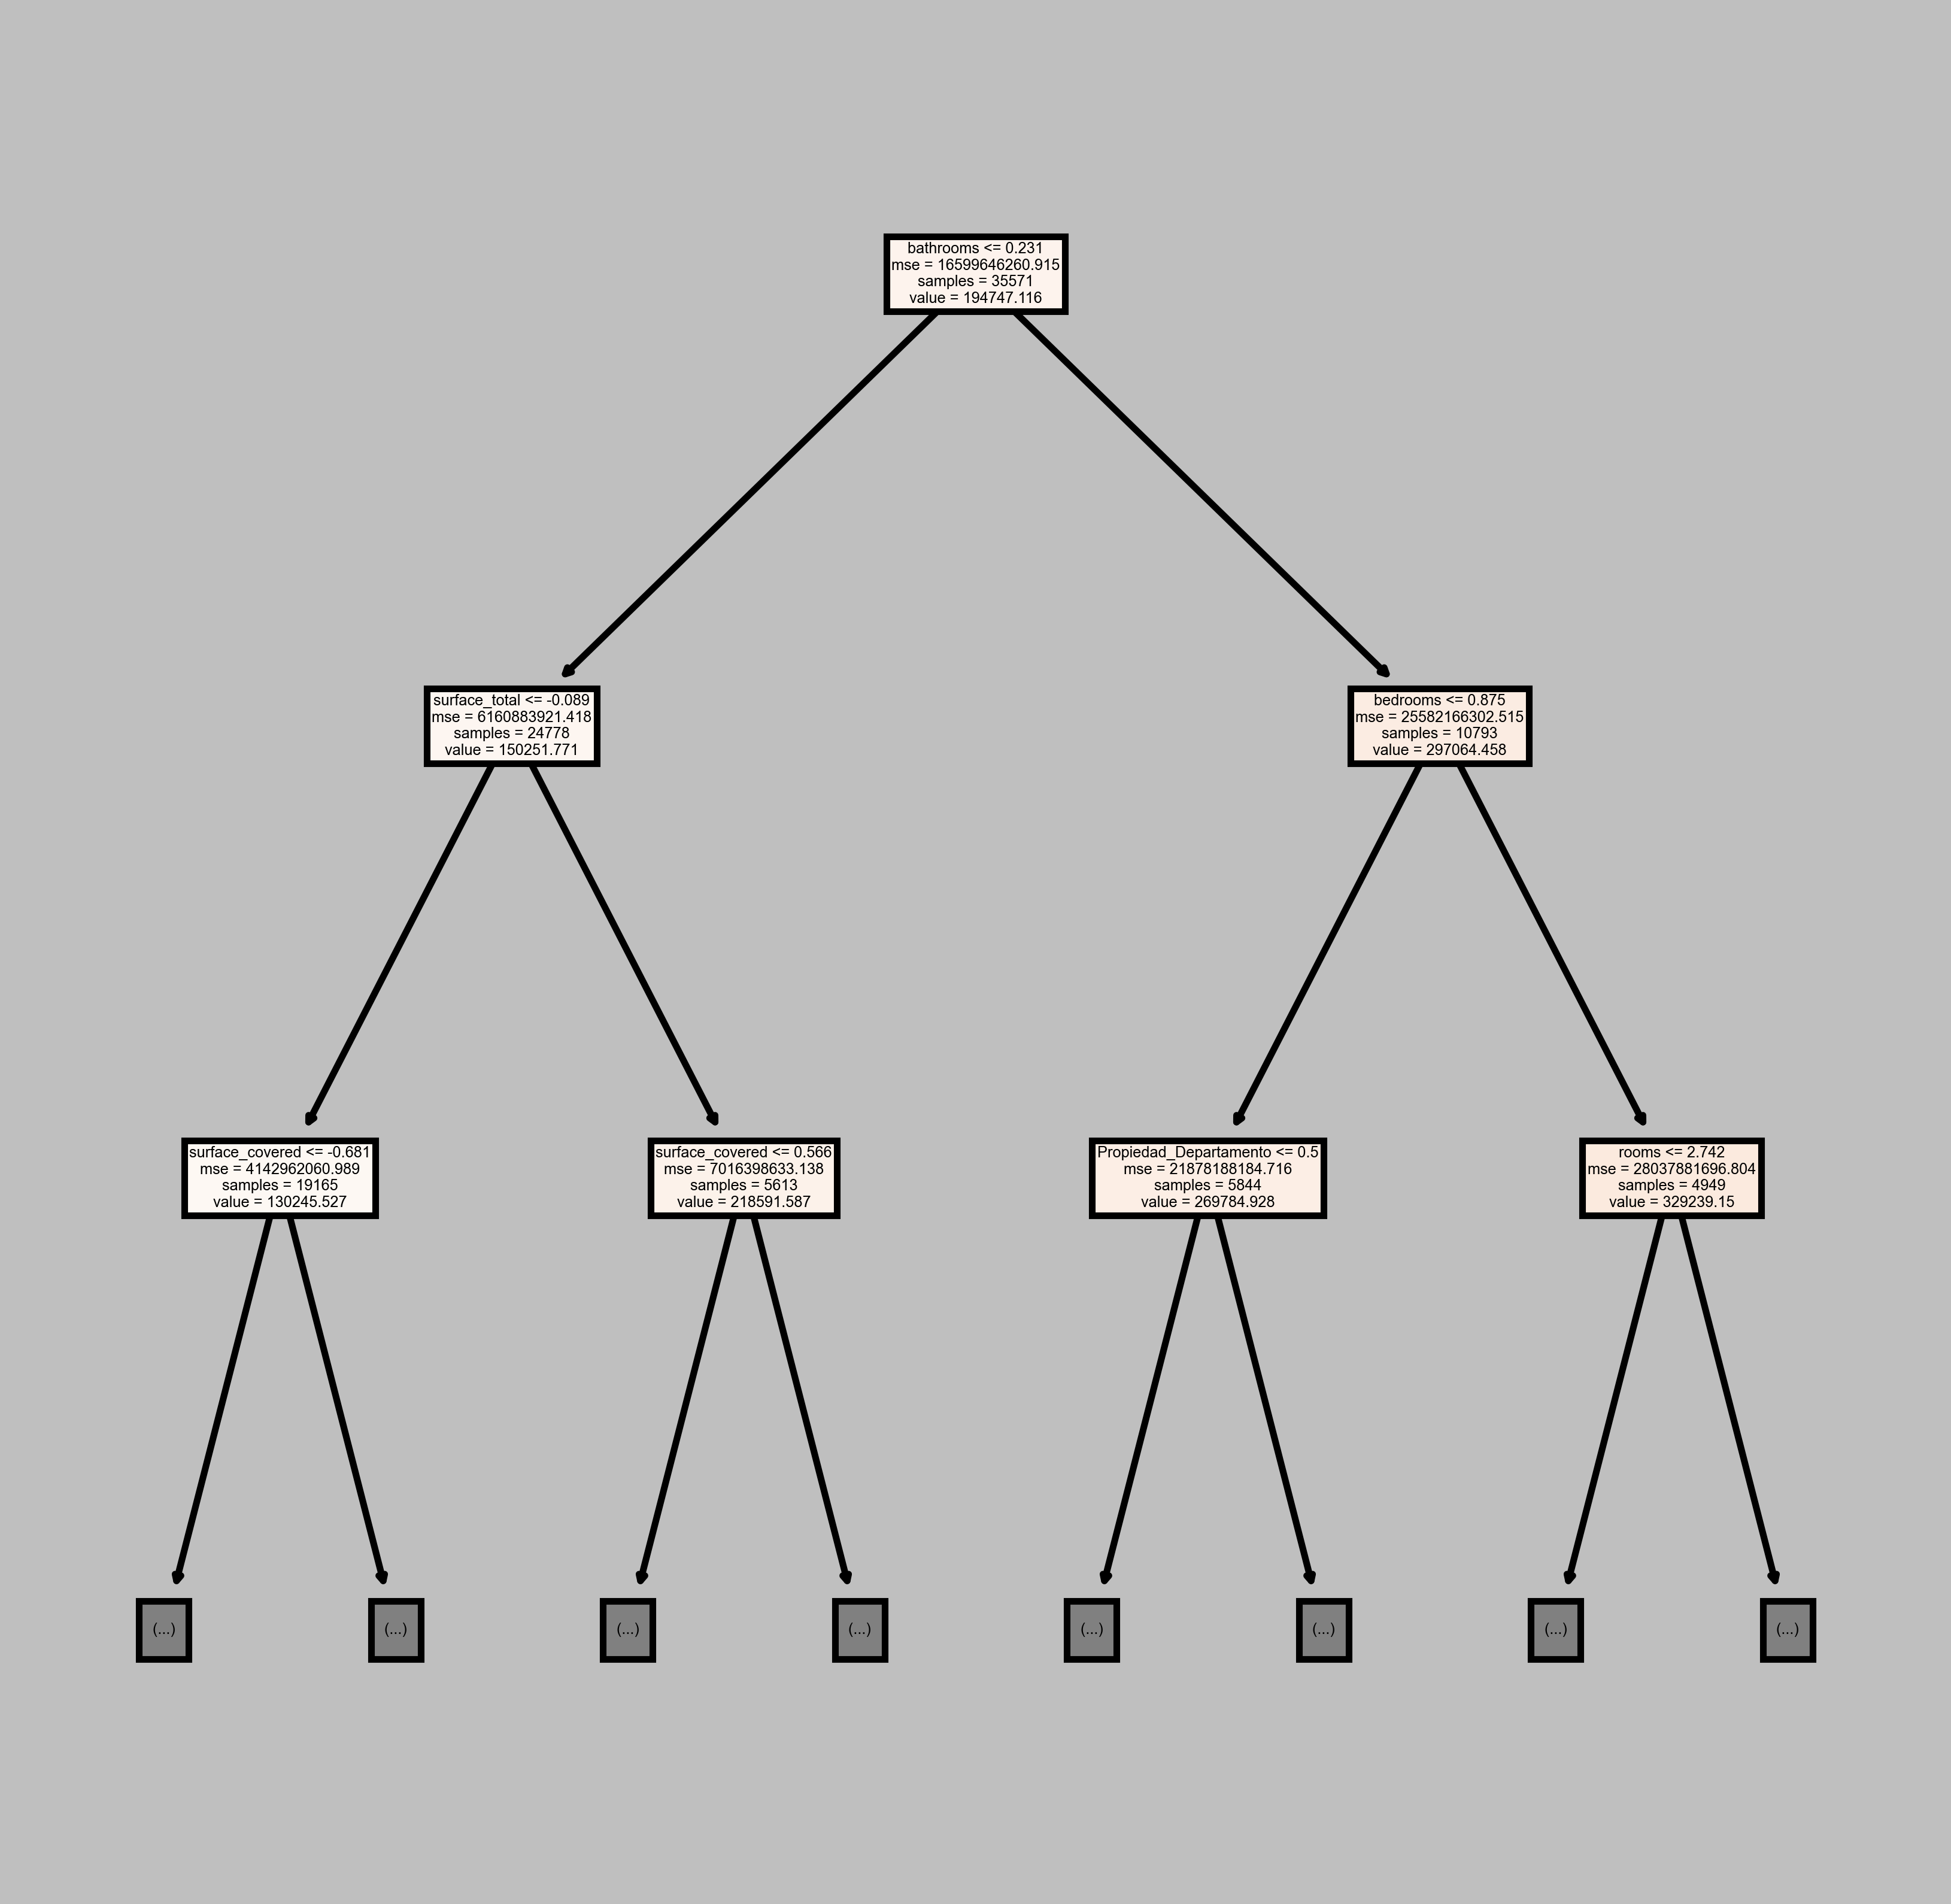

Esquema para el arbol #: 3


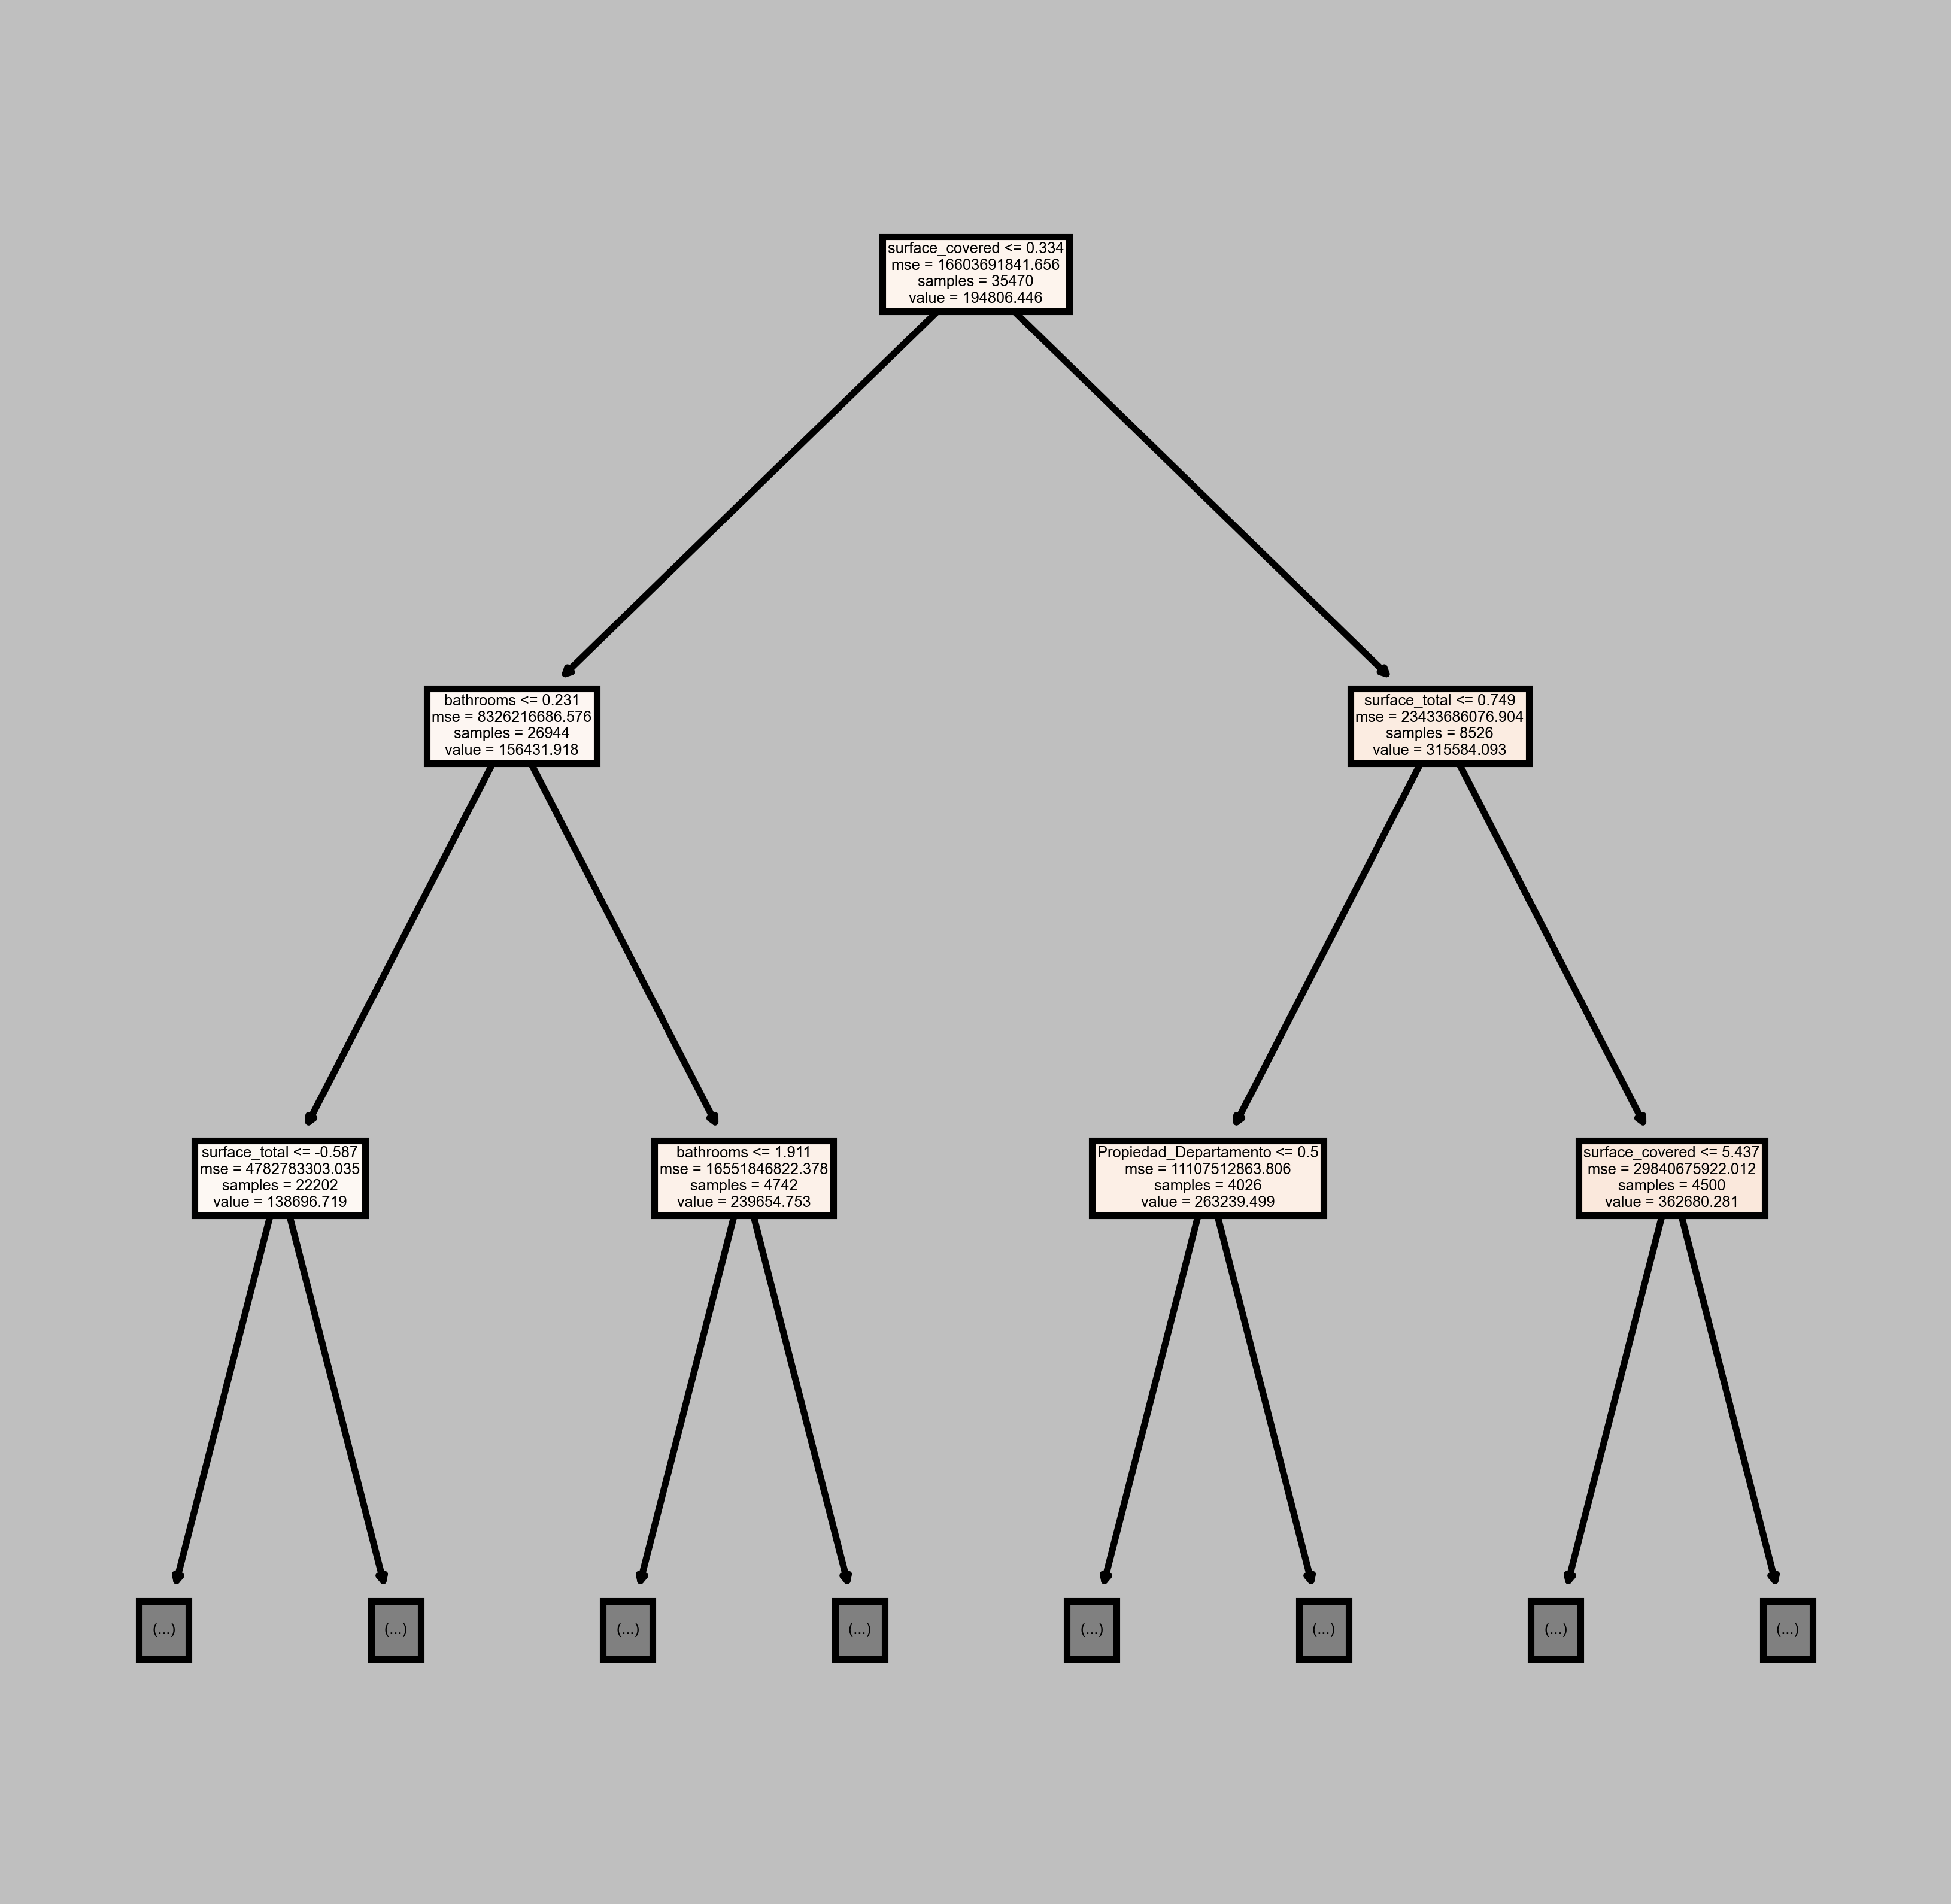

Esquema para el arbol #: 4


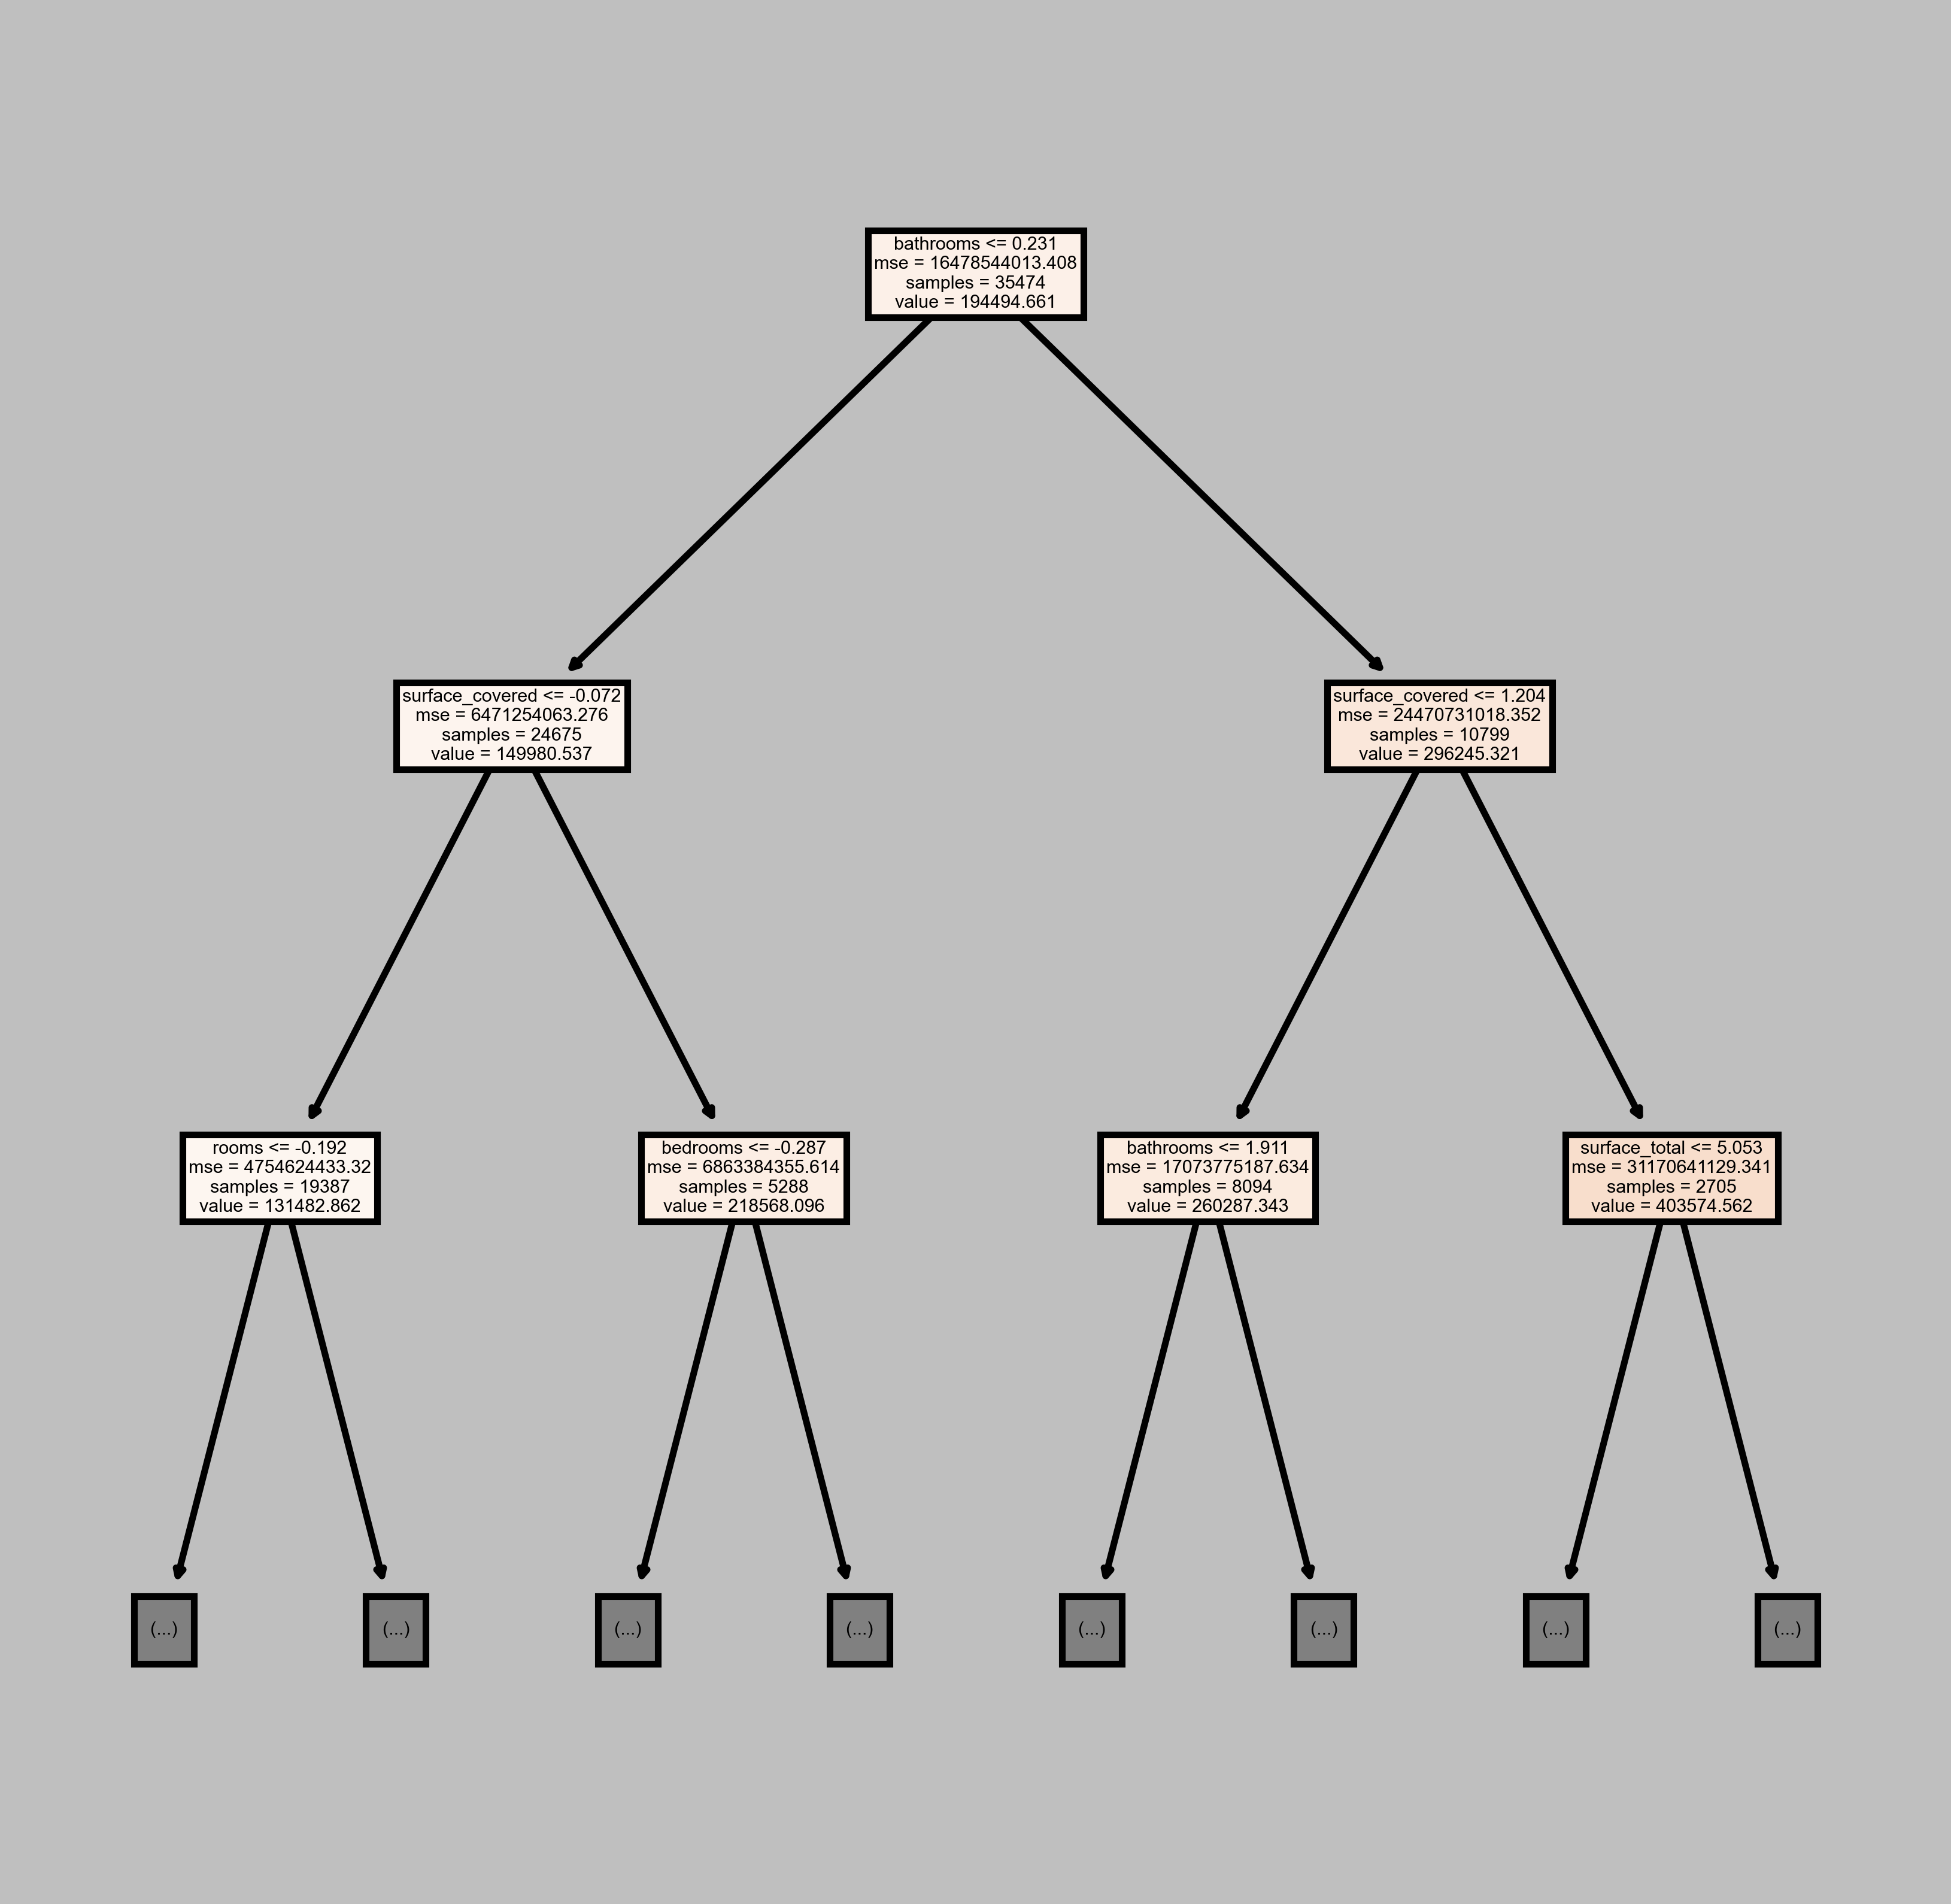

Esquema para el arbol #: 5


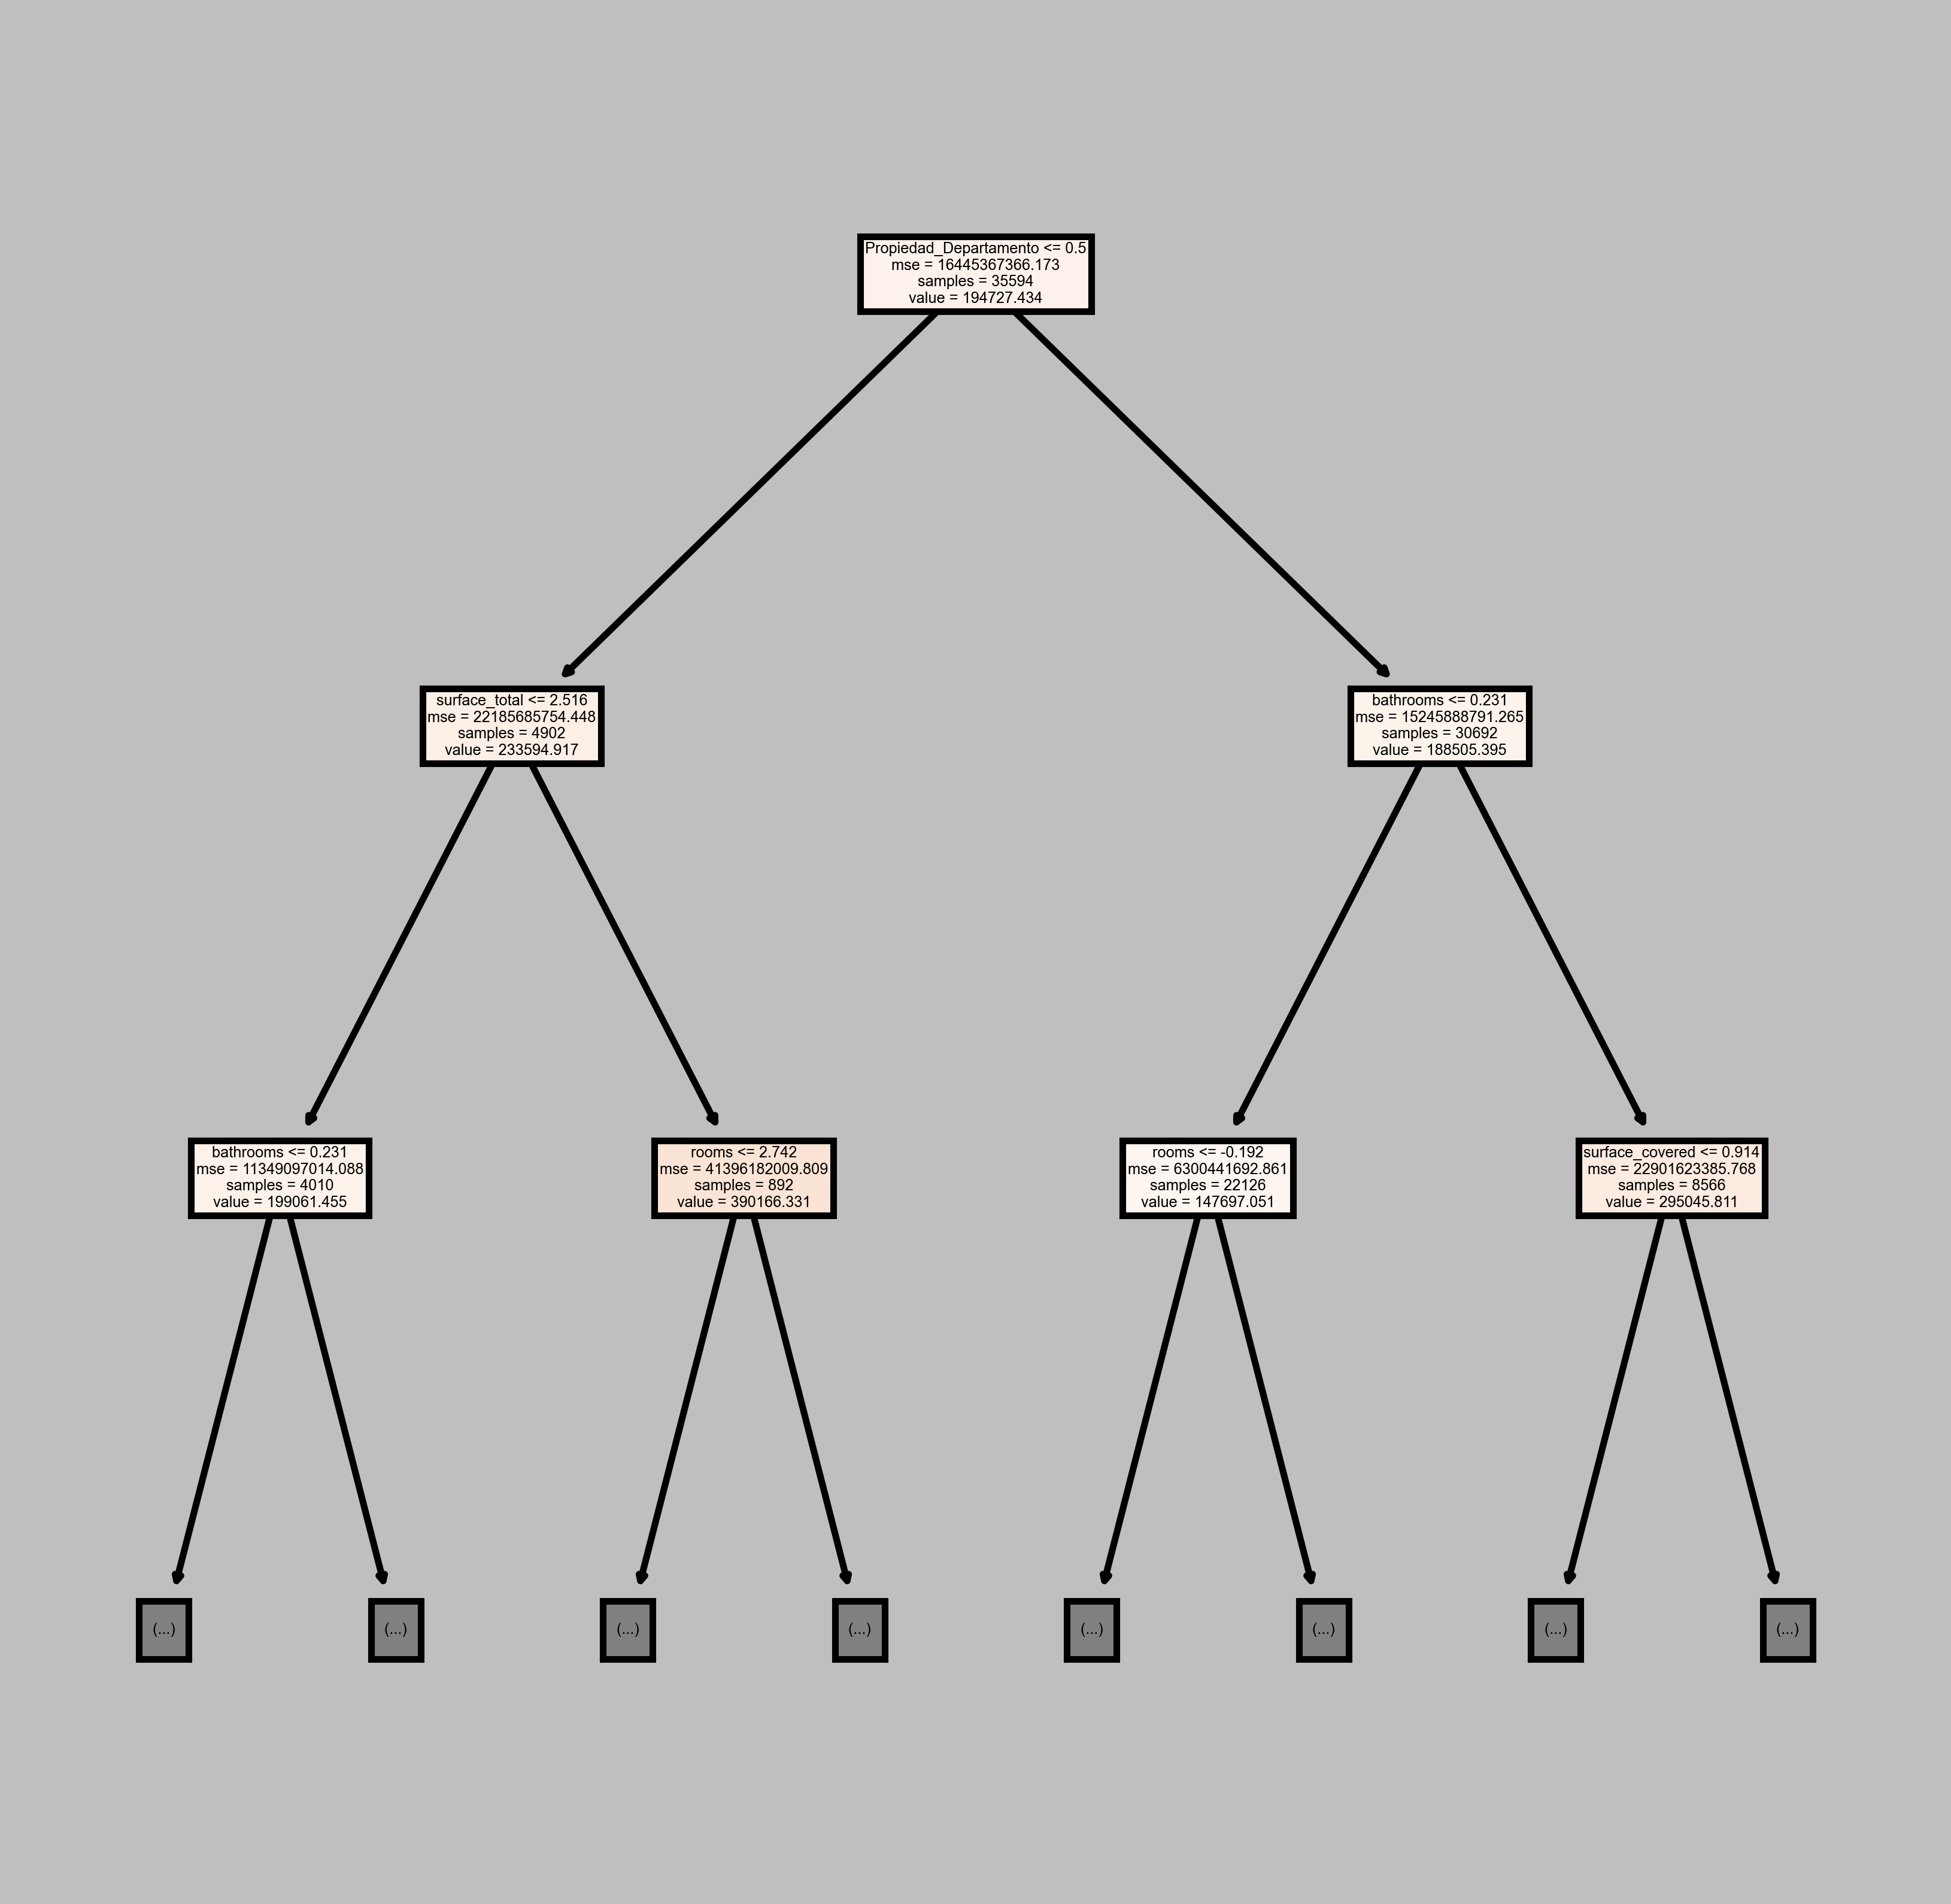

Esquema para el arbol #: 6


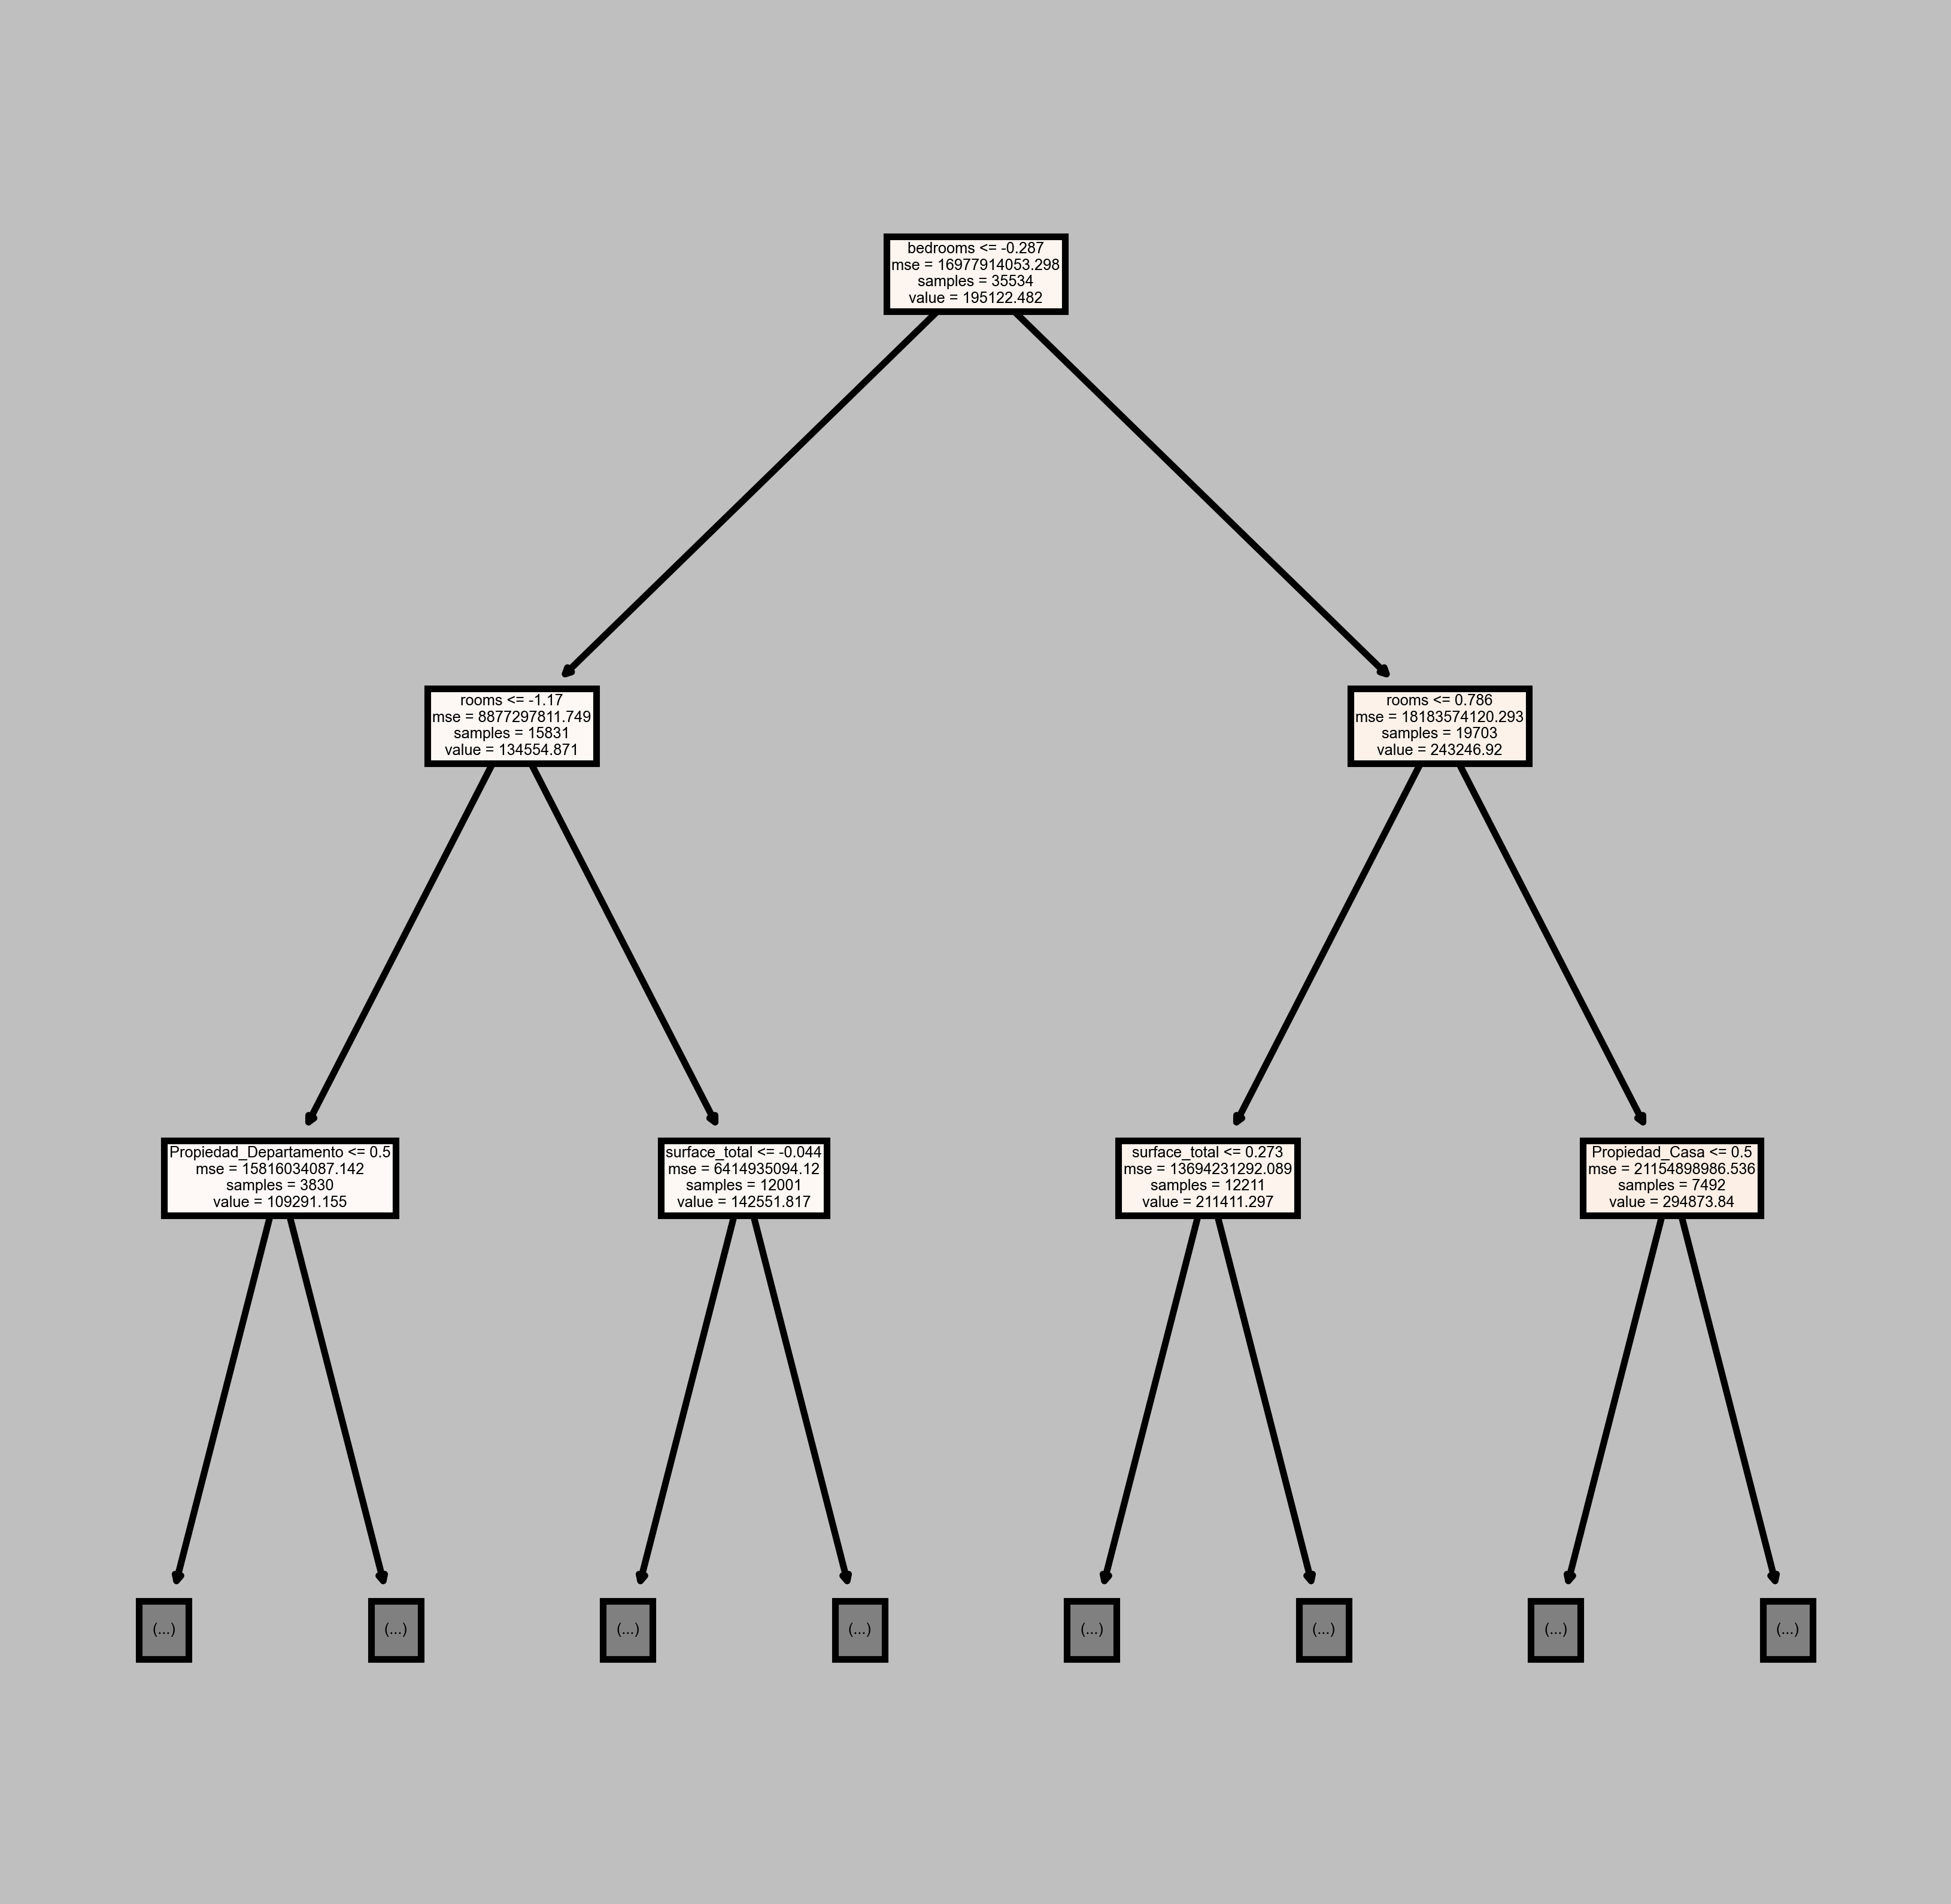

Esquema para el arbol #: 7


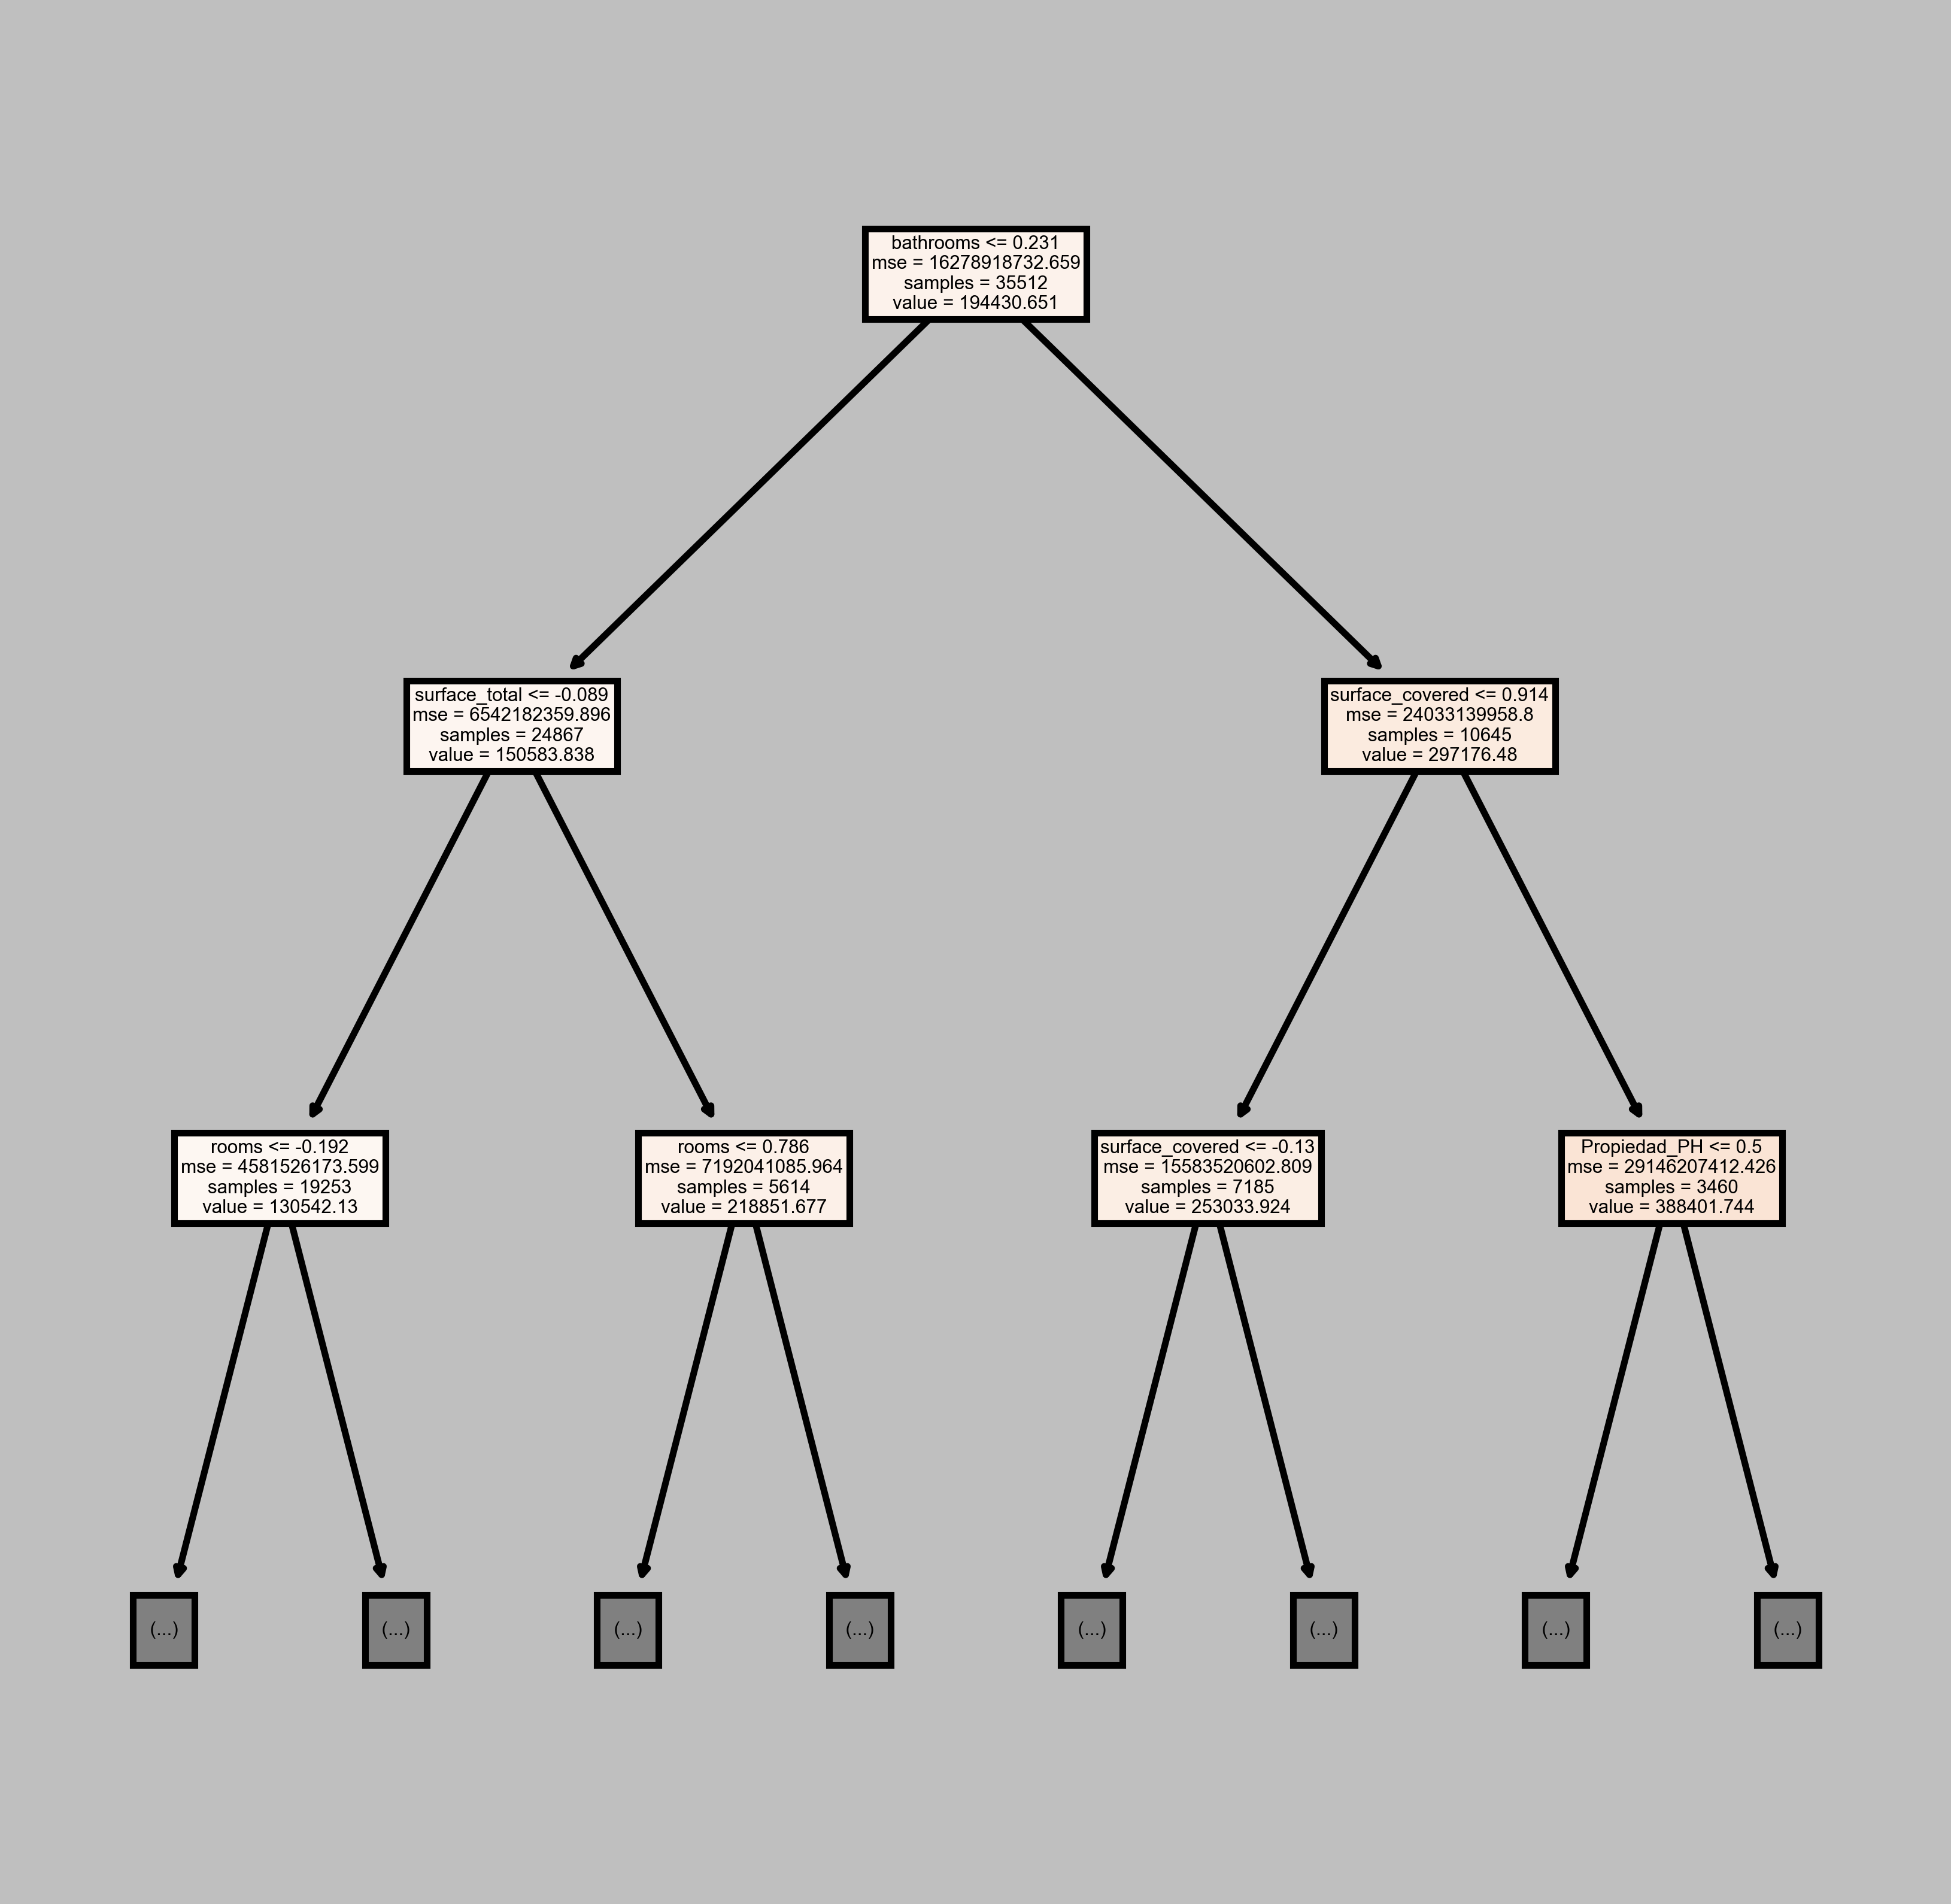

Esquema para el arbol #: 8


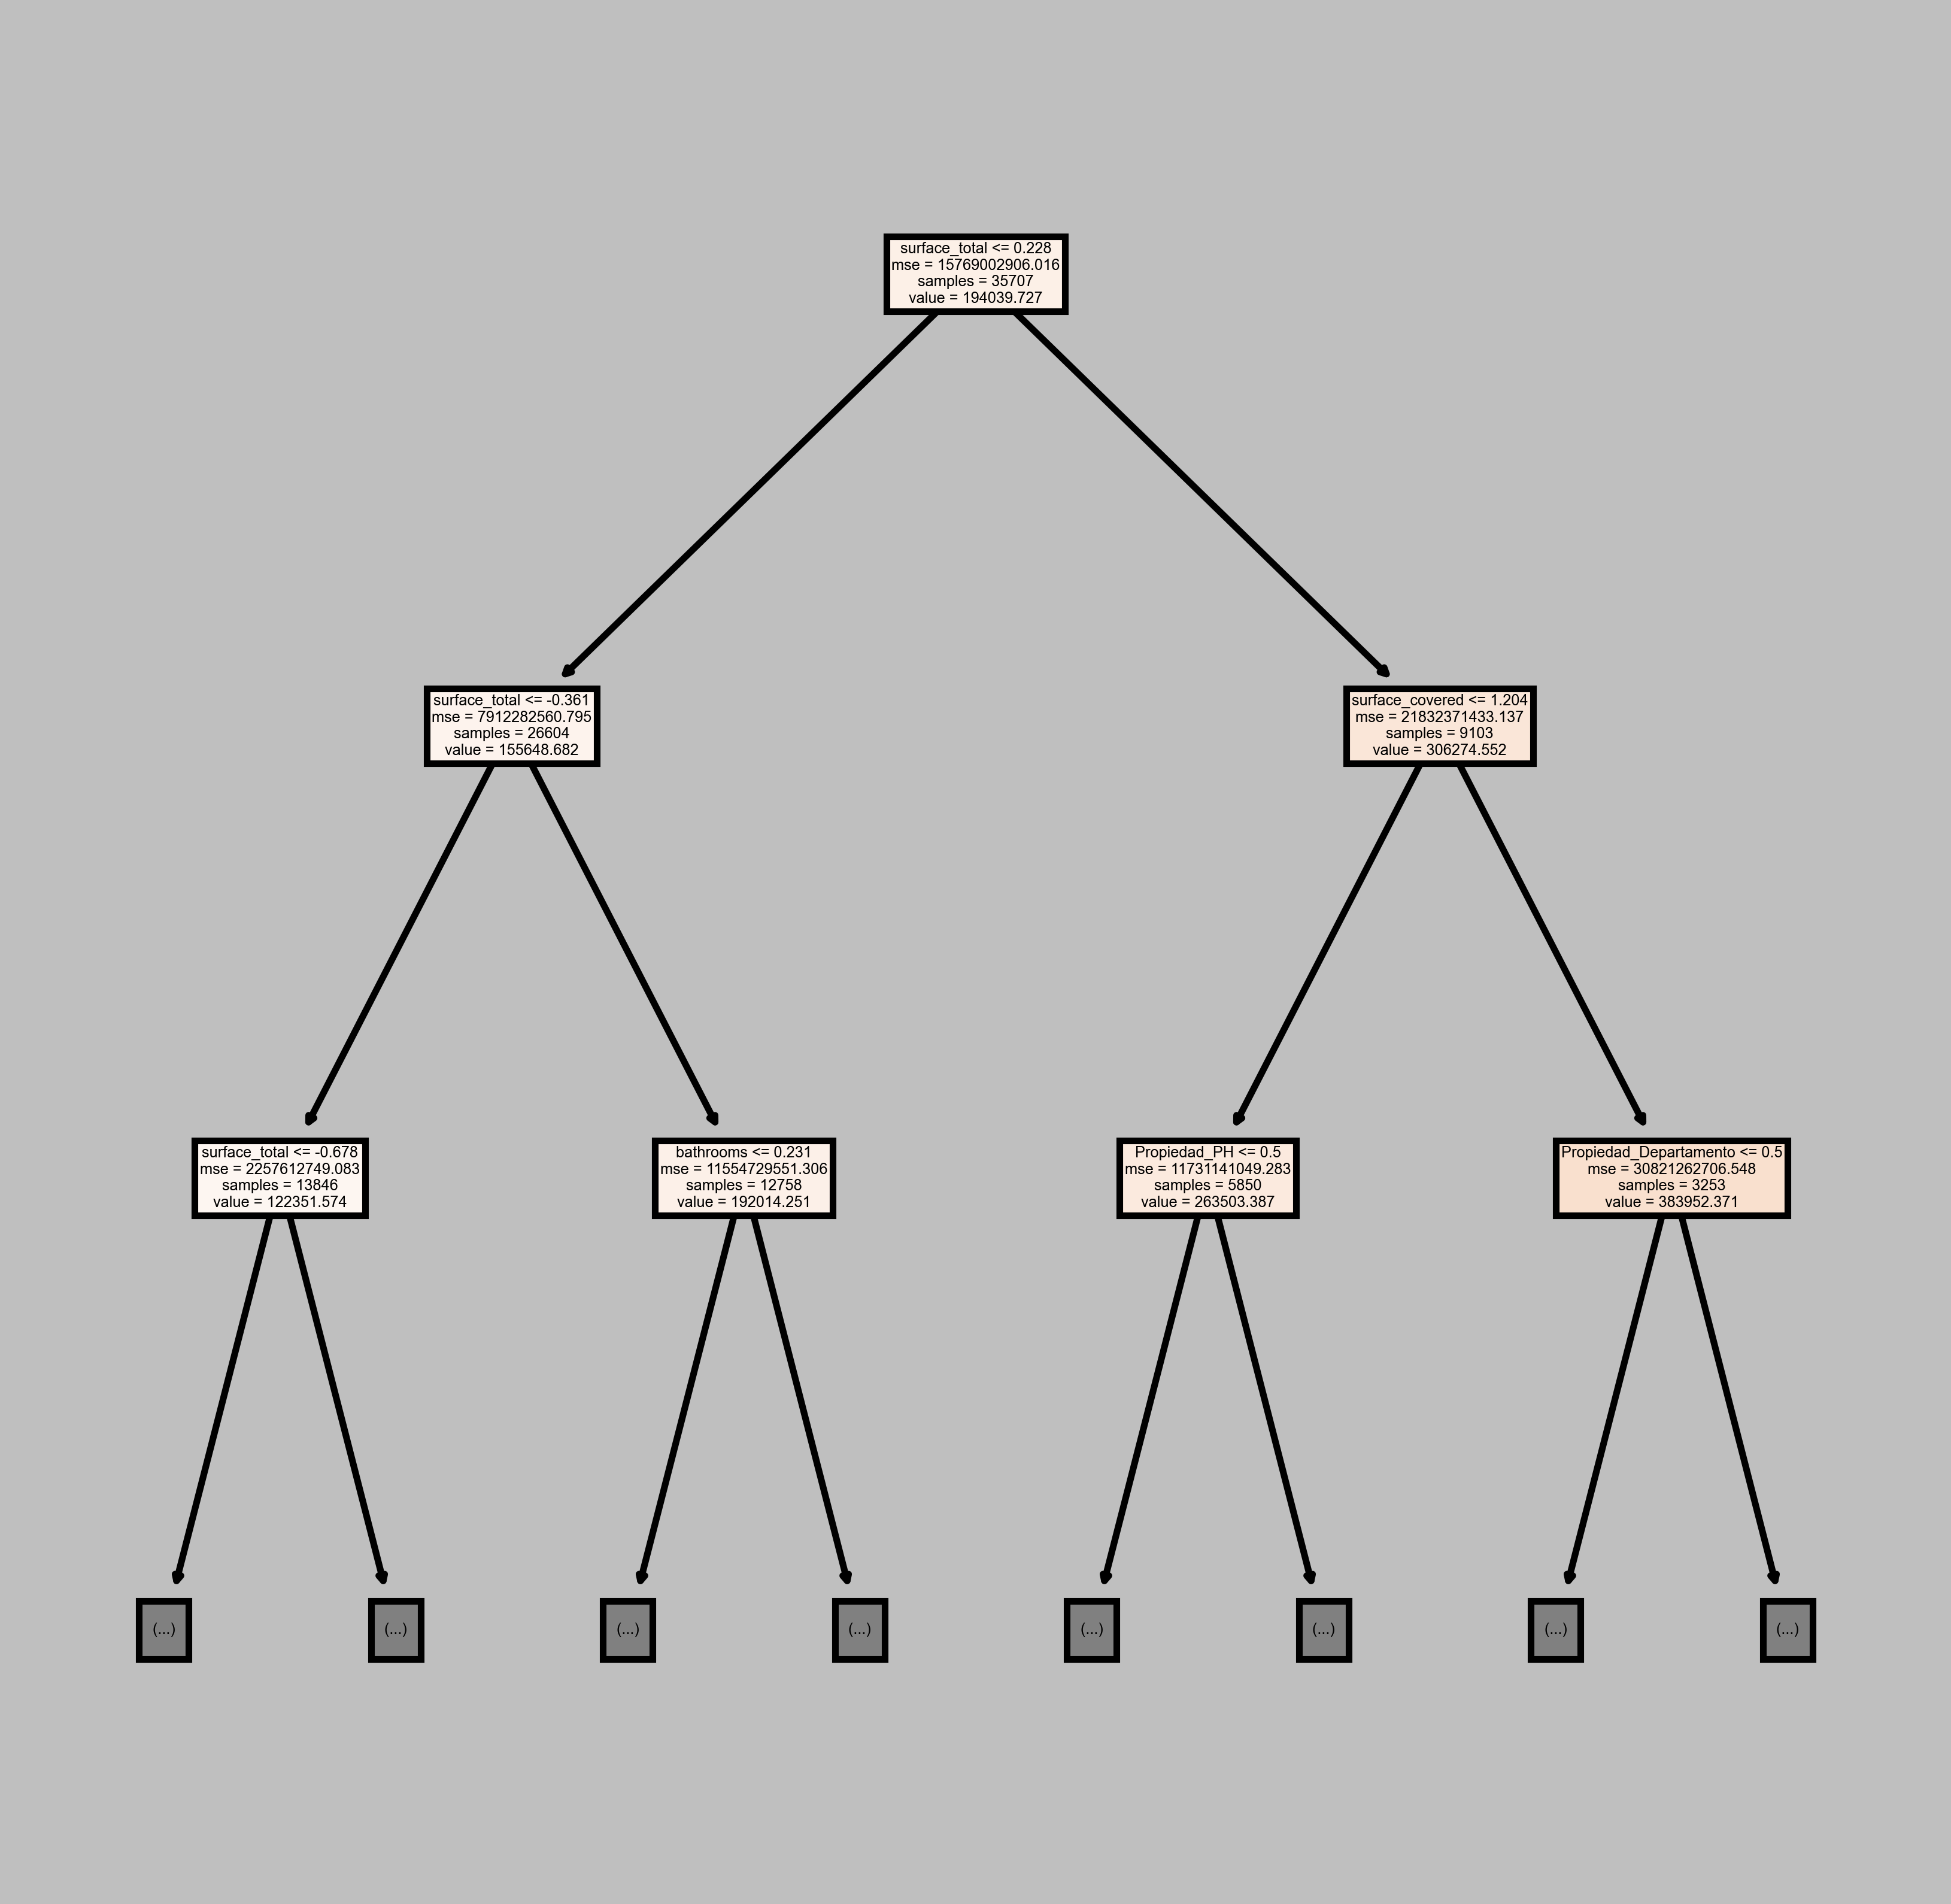

Esquema para el arbol #: 9


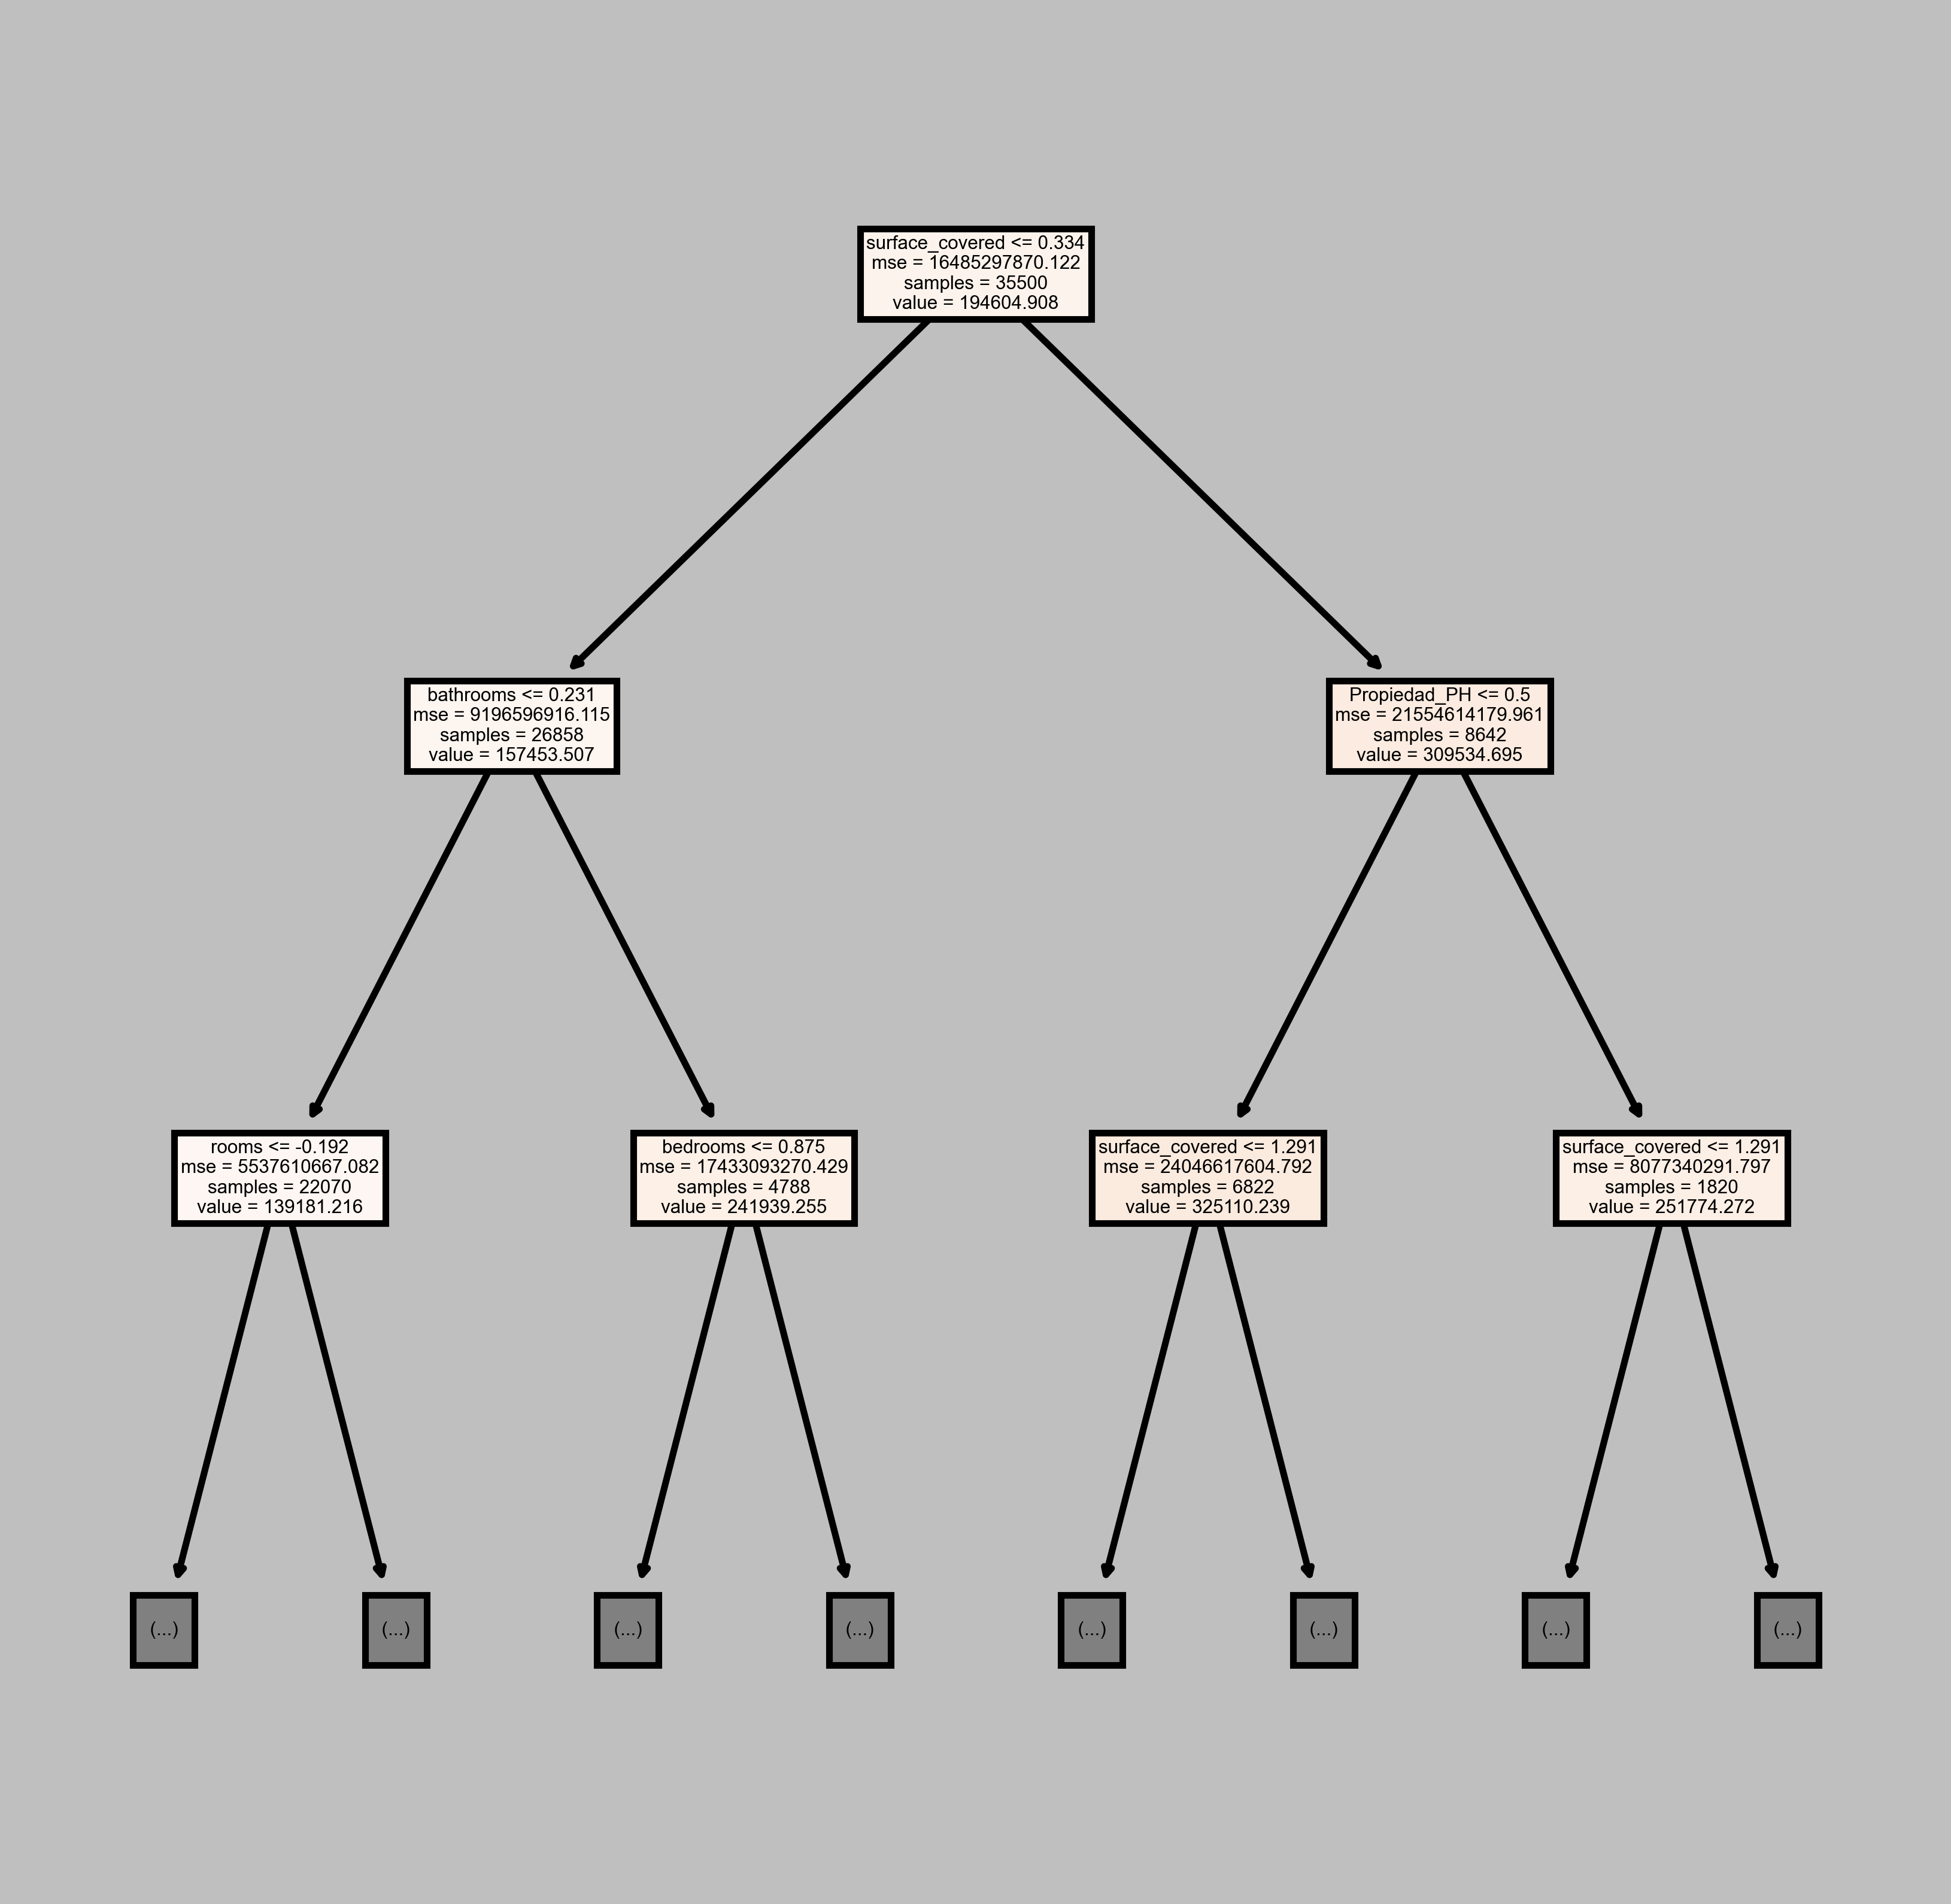

Esquema para el arbol #: 10


MemoryError: In RendererAgg: Out of memory

<Figure size 4000x4000 with 1 Axes>

Esquema para el arbol #: 11


MemoryError: In RendererAgg: Out of memory

MemoryError: In RendererAgg: Out of memory

<Figure size 4000x4000 with 1 Axes>

In [73]:
for i in range(40):
    print(f'Esquema para el arbol #: {i+1}')
    esquema_arbol(i)


Con los esquemas de arbol para cada estimador podemos ractificar la grafica anterior donde las caracteristica surface_covered, bathrooms y surface_total  son las más decisivas a la hora de dividir los datos, de acuerdo al precio. Esto va muy ligado a la logica del negocio pues se espera que entre mas grande sea la propiedad y entre mas confort(#baños) el precio aumente

## Optimización de hiperparamtros 

Para la optimización de hiperparametros emplearemos un random search, por motivos computacionales y por abarcar una mayor cantida de valores en los parametros(mayor rango), los hiperparametros a optimizar seran los del random forest: n_estimators,max_depth, max_features, min_samples_split, min_samples_leaf,criteriun


In [50]:
#variable a predecir precio 
data_optimizada=data_modelo.copy()
columnas_eliminadas=['l2','l3','price','Propiedad_PH','Propiedad_Departamento','Propiedad_Casa']
X=data_modelo.drop(columns=columnas_eliminadas)
y=data_modelo['price']

In [46]:
#Generamos la grilla
import scipy as sp
parametros = {'n_estimators':sp.stats.randint(40, 60), #40x50
              'max_depth': [sp.stats.randint(2,20),None], 
              'max_features':['auto', 'sqrt','log2'],
              'min_samples_split':sp.stats.randint(2, 10),
              'min_samples_leaf':sp.stats.randint(2, 10),
              'criterion':['mse','mae']}

In [47]:
from sklearn.model_selection import RandomizedSearchCV
bosque = RandomForestRegressor()
scorings=['r2','neg_root_mean_squared_error']
modelo = RandomizedSearchCV(bosque, parametros, n_iter = 20, n_jobs =-1, random_state=0,cv = 5,scoring='r2')

In [57]:
modelo.fit(X_train, y_train)

C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.65742186 0.63037799        nan 0.64942725 0.6424253  0.62281735
        nan        nan        nan 0.64777534 0.62303739        nan
 0.63767882 0.63316256 0.63158149 0.63665002        nan 0.644664
 0.64927415 0.6199345 ]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [<scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017037CC25E0>,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017037CB3430>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017037CB3F70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017037AD1E20>},
                   random_state=0, scoring='r2')

In [58]:
print("Mejores parametros: "+str(modelo.best_params_))
print("Mejor Score: "+str(modelo.best_score_)+'\n')

scores = pd.DataFrame(modelo.cv_results_)
scores

Mejores parametros: {'criterion': 'mse', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 43}
Mejor Score: 0.6574218638238501



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.720150      0.099299         0.195578        0.009460   
1      398.257132      4.264438         0.129407        0.002959   
2        0.052368      0.003488         0.000000        0.000000   
3      503.801767      4.437642         0.153600        0.002090   
4     1422.930544      9.984309         0.211230        0.007161   
5        2.025785      0.092516         0.141346        0.006494   
6        0.060921      0.001323         0.000000        0.000000   
7        0.052448      0.003243         0.000000        0.000000   
8        0.062584      0.004322         0.000000        0.000000   
9        4.316937      0.259347         0.156343        0.028412   
10       2.124012      0.061202         0.160088        0.035935   
11       0.048385      0.003987         0.000000        0.000000   
12     408.292902      6.433335         0.144125        0.004094   
13     442.428209      8.021705         0.119906        0.003965   
14       1.887146      0.078813         0.134971        0.003794   
15       5.388859      0.235507         0.170803        0.007259   
16       0.049977      0.003753         0.000000        0.000000   
17       5.393913      0.129804         0.180963        0.003243   
18     401.684416      4.204275         0.152191        0.001316   
19     924.472301     63.443610         0.118098        0.007314   

   param_criterion                                    param_max_depth  \
0              mse                                               None   
1              mae                                               None   
2              mse  <scipy.stats._distn_infrastructure.rv_frozen o...   
3              mae                                               None   
4              mae                                               None   
5              mse                                               None   
6              mse  <scipy.stats._distn_infrastructure.rv_frozen o...   
7              mae  <scipy.stats._distn_infrastructure.rv_frozen o...   
8              mae  <scipy.stats._distn_infrastructure.rv_frozen o...   
9              mse                                               None   
10             mse                                               None   
11             mae  <scipy.stats._distn_infrastructure.rv_frozen o...   
12             mae                                               None   
13             mae                                               None   
14             mse                                               None   
15             mse                                               None   
16             mae  <scipy.stats._distn_infrastructure.rv_frozen o...   
17             mse                                               None   
18             mae                                               None   
19             mae                                               None   

   param_max_features param_min_samples_leaf param_min_samples_split  \
0                sqrt                      2                       5   
1                sqrt                      4                       6   
2                auto                      4                       3   
3                log2                      2                       3   
4                auto                      3                       6   
5                sqrt                      8                       9   
6                auto                      3                       5   
7                auto                      3                       3   
8                auto                      9                       5   
9                auto                      4                       2   
10               sqrt                      8                       2   
11               sqrt                      4                       4   
12               sqrt                      3                       5   
13               log2            

In [60]:
scores.to_csv('scores.csv')

In [59]:
prediction_train = modelo.predict(X_train)
prediction_test = modelo.predict(X_test)
print('El error para los datos de train es:', np.sqrt(mean_squared_error(y_train, prediction_train)))
print('El error para los datos de test es:',np.sqrt(mean_squared_error(y_test, prediction_test)))
print('El error r^2 es:', r2_score(y_test,prediction_test))

El error para los datos de train es: 66142.45328918425
El error para los datos de test es: 65427.635083890396
El error r^2 es: 0.7109749355893902


## 2°Modelo Regresion 

Para este modelo usaremos el set de datos estandarizado y buscaremos un modelo complejo con combinacion de polinomios, teniendo cuidado con el sobreajuste.

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn as sk 

In [77]:
data_modelo_2=data_escalada.copy()
columnas_eliminadas=['l2','l3','price','Propiedad_PH','Propiedad_Departamento','Propiedad_Casa']
X=data_modelo_2.drop(columns=columnas_eliminadas)
y=data_modelo_2['price']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
poly = sk.preprocessing.PolynomialFeatures(2, include_bias=False)
poly_train = poly.fit(X_train)
X_train_poly = poly_train.transform(X_train)
X_test_poly = poly.fit_transform(X_test)
print(X_train_poly.shape, X_test_poly.shape)

(56184, 20) (24079, 20)


In [83]:
regresion = LinearRegression()
regresion.fit(X_train_poly, y_train)
print(regresion.coef_, regresion.intercept_)
y_train_pred_2 = regresion.predict(X_train_poly)
y_test_pred_2 = regresion.predict(X_test_poly)

[-2534.77463027  4796.59050753 33167.25830657 20081.07085731
 52408.6100154  -1521.32295063  3105.62697739 -6352.6922083
  9119.51710793 -4784.1027269  -5474.15273744  -482.84345686
 -7536.05345541 -3244.48551352  9161.6969374  -6109.75199756
  5086.80205836 -4719.74894103  7742.99959093 -4715.18967325] 200081.70878170567


In [53]:
def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('El error r^2 es:', r2_score(y_test,y_test_pred))

    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

Raíz del error cuadrático medio en Train: 90742.35241144928
Raíz del error cuadrático medio en Test: 84475.59763873152
El error r^2 es: 0.5181902247355161


C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


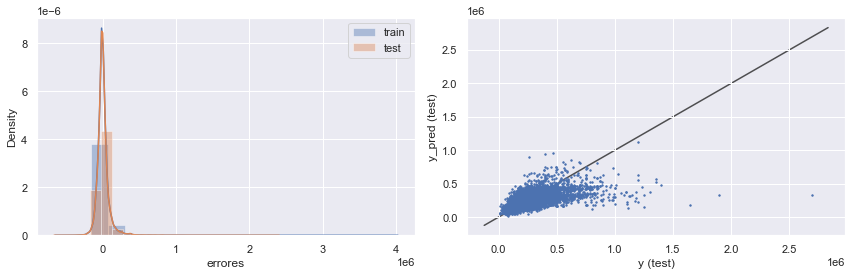

In [54]:
evaluar_regresion(regresion, X_train_poly, X_test_poly, y_train, y_test)

Evaluar las regresiones subiendo de orden los polinomios seria una buena estrategia para encontrar el grado del polinomio optimo para nuestrio modelo,sin embargo esto tambien puede sobreajustar los datos y tener un modelo con alta varianza. Lo que haremos a continuacion sera buscar  el valor optimo del hiperparametro degree, y encontrar el valor adecuado de  alpha en la regresion regularizada Lasso.Se escoge esta ultima porque a diferencia del ridge la lasso permite excluir algunos coeficientes que no son importantes, haciendolos cero. 

## Regularización 

In [55]:
from sklearn.linear_model import Lasso

In [56]:
data_modelo_3=data_escalada.copy()
columnas_eliminadas=['l2','l3','price','Propiedad_PH','Propiedad_Departamento','Propiedad_Casa']
X=data_modelo_3.drop(columns=columnas_eliminadas)
y=data_modelo_3['price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
alphas=np.linspace(0.1,3,50)

In [59]:
#Valor optimo de alpha y degree Grid Search manual
n=4 #grado de polinomio 
rmse_test_optimo=float("inf")
lista_rmse_train = []
lista_rmse_test = []
for alpha in alphas:
    for grado in np.arange(2,n+1):
        poly = sk.preprocessing.PolynomialFeatures(grado, include_bias=False)
        poly_train = poly.fit(X_train)
        X_train_poly = poly_train.transform(X_train)
        X_test_poly = poly.fit_transform(X_test)
   
        modelo_n = Lasso(alpha = alpha)
        # Entrenar el modelo
        modelo_n.fit(X_train_poly, y_train)

        # Predecir y evaluar sobre el set de entrenamiento
        y_train_pred = modelo_n.predict(X_train_poly)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

        # Predecir y evaluar sobre el set de evaluación
        y_test_pred = modelo_n.predict(X_test_poly)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Agregar la información a las listas
        lista_rmse_train.append(rmse_train)
        lista_rmse_test.append(rmse_test)

        #comparar el error en test 
        if rmse_test<rmse_test_optimo:
            rmse_test_optimo=rmse_test
            rmse_train_optimo=rmse_train
            alpha_optimo=alpha
            grado_opt=grado
            modelo_opt=modelo_n



C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4289492896849.5, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220826823553529.8, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215672715528093.22, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139034552080.4375, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220193030982315.34, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215674894000512.84, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219350917226386.88, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215677760634436.8, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219280878564419.88, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215680813345647.03, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218372305618450.88, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215681045381919.56, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_

C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217467031511069.38, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215684040092650.22, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217397471229998.72, tolerance: 90633320839.76295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\sklearn\linear_

In [60]:
print('El alpha optimo para la regresion lasso es:',alpha_optimo)
print('El grado de polinomio optimo es:' ,grado_opt)
print('Con estos hiperparametros se obtuvo un error rmse_test minimo de :', rmse_test_optimo)
print('Con estos hiperparametros se obtuvo un error rmse_train minimo de :', rmse_train_optimo)


El alpha optimo para la regresion lasso es: 0.1
El grado de polinomio optimo es: 4
Con estos hiperparametros se obtuvo un error rmse_test minimo de : 81311.37406926052
Con estos hiperparametros se obtuvo un error rmse_train minimo de : 87620.55113879607


Raíz del error cuadrático medio en Train: 87620.55113879607
Raíz del error cuadrático medio en Test: 81311.37406926052
El error r^2 es: 0.5536087619583556


C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


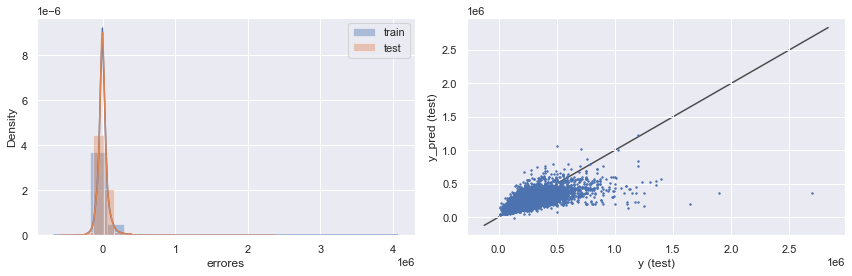

In [61]:
evaluar_regresion(modelo_opt, X_train_poly, X_test_poly, y_train, y_test)

Para los modelos de regresion se obtuvieron errores similares para train y test, lo cual nos indica que los modelos no sufren de varianza ni de subajuste. Sin embargo aun se puede mejorar con un grado mayor de polinomio, en este trabajo no se hizo esto por limitaciones de maquina, pero en servidores virtuales o en computadores mas potentes se podria correr y ver resultados mejores en los errorres.

Por otra parte en las graficas se evidencian que la mayoria de los errores fueron ceros, y que el modelo predijo en su mayoria buen los valores. No obstante tambien se puede observar que hay algunos puntos muy lejanos de la linea recta,y que son estos puntos los que hacen que no se obtengan mejor metrica en el error. Como mejora podriamos analizar mas detalladamente estos puntos y ver si son puntops que se salen de la logica del negocio y de esta manera poder eliminarlos o procesarlos de otra forma.

## Desafío opcional

Se utilizará una técnica de clusterización para las variables de Lat y Lon del dataset.

In [72]:
data_filtrada.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
5  2019-10-17  2019-11-01  2019-10-17 -34.593779 -58.441239  Argentina   

                l2             l3  rooms  bedrooms  bathrooms  surface_total  \
0  Capital Federal  San Cristobal    7.0       7.0        2.0          140.0   
1  Capital Federal          Boedo    2.0       1.0        2.0           70.0   
2  Capital Federal        Palermo    2.0       1.0        1.0           45.0   
3  Capital Federal        Palermo    2.0       1.0        1.0           85.0   
5  Capital Federal   Villa Crespo    2.0       1.0        1.0           56.0   

   surface_covered     price currency  \
0            140.0  153000.0      USD   
1             58.0  159000.0      USD   
2             45.0  125000.0      USD   
3             50.0  295000.0      USD   
5             56.0  150000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
5  Depto.tipo casa de 2 ambientes en Venta en Vil...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
5  Excelente ph solo 2 unidades, no paga expensas...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
5          Venta

In [88]:
data_clus = data_filtrada[["lat","lon"]]
data_clus.head()

lat        lon
0 -34.605880 -58.384949
1 -34.624056 -58.412110
2 -34.593569 -58.427474
3 -34.581294 -58.436754
5 -34.593779 -58.441239

In [75]:
data_clus.isnull().sum()

lat    4534
lon    4548
dtype: int64

Se buscará una forma optima en rellenar los valores faltantes.

In [78]:
X=data_filtrada[["lat","lon"]]
y=data_filtrada["price"]
X.head()

lat        lon
0 -34.605880 -58.384949
1 -34.624056 -58.412110
2 -34.593569 -58.427474
3 -34.581294 -58.436754
5 -34.593779 -58.441239

In [83]:
vecinos = [1,3,6,12,18,21,24]
for v in vecinos:
    
    KNN_imputer=KNNImputer(n_neighbors=v)
    KNN_imputer.fit(X)
    
    X_knn= KNN_imputer.transform(X)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_knn,y)
    
    y_pred = tree.predict(X_knn)
    r2 = metrics.r2_score(y, y_pred)
    RMSE=np.sqrt(mean_squared_error(y,y_pred))
    
    print("Vecinos utilizadps: ",v)
    print("RMSE:",RMSE)
    print("R cuadrado:",r2)
    print("-----------------------------")

Vecinos utilizadps:  1
RMSE: 236134.805748694
R cuadrado: 0.46309519722630543
-----------------------------
Vecinos utilizadps:  3
RMSE: 236134.04135706034
R cuadrado: 0.46309867324817977
-----------------------------
Vecinos utilizadps:  6
RMSE: 236132.30783394023
R cuadrado: 0.4631065562915684
-----------------------------
Vecinos utilizadps:  12
RMSE: 236133.20323197357
R cuadrado: 0.46310248455526526
-----------------------------
Vecinos utilizadps:  18
RMSE: 236132.8845710105
R cuadrado: 0.4631039336370679
-----------------------------
Vecinos utilizadps:  21
RMSE: 236132.02955321752
R cuadrado: 0.4631078217432032
-----------------------------
Vecinos utilizadps:  24
RMSE: 236133.02024066195
R cuadrado: 0.46310331669188254
-----------------------------


Se utiliza un número de cinos.

In [93]:
KNN_imputer=KNNImputer(n_neighbors=6)
KNN_imputer=KNN_imputer.fit(data_clus)
data_clus.iloc[:,0:4]=KNN_imputer.transform(data_clus.iloc[:,0:4])

C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jean Piere Castro\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [94]:
data_clus

lat        lon
0      -34.605880 -58.384949
1      -34.624056 -58.412110
2      -34.593569 -58.427474
3      -34.581294 -58.436754
5      -34.593779 -58.441239
...           ...        ...
146554 -34.585355 -58.427194
146555 -34.585355 -58.427194
146556 -34.584134 -58.436389
146557 -34.583995 -58.417645
146558 -34.599081 -58.436002

[91485 rows x 2 columns]

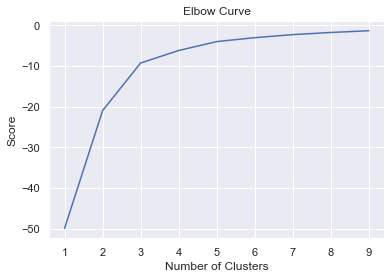

In [95]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
y_lat = data_clus[['lat']]
X_lon = data_clus[['lon']]
score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Se evidencia el codo en un valor de 3.

In [97]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(data_clus[data_clus.columns[0:2]]) # Compute k-means clustering.
lat_lon['cluster_label'] = kmeans.fit_predict(data_clus[data_clus.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(data_clus[data_clus.columns[0:2]]) # Labels of each point
lat_lon.head(10)

<ipython-input-97-f761b85a72bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lat_lon['cluster_label'] = kmeans.fit_predict(data_clus[data_clus.columns[0:2]])


lat        lon  cluster_label
0  -34.605880 -58.384949              5
1  -34.624056 -58.412110              1
2  -34.593569 -58.427474              9
3  -34.581294 -58.436754              8
5  -34.593779 -58.441239              8
6  -34.600988 -58.433061              8
7  -34.600988 -58.433061              8
8  -34.639598 -58.419612              1
9  -34.639598 -58.419612              1
10 -34.586225 -58.496220              2

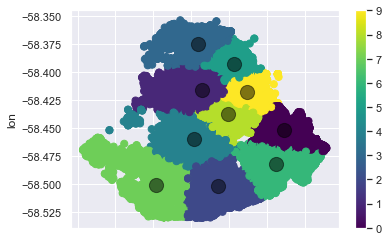

In [99]:
lat_lon.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## Conclusiones y futuras mejoras

1. Se logro el principal objetivo de mejorar nuestro modelo del primer sprint, bajando el error a mas de la mitad, obteniendo errores rms en train y test de cerca a los 60000, de acuerdo a la escala de los precios este error es bueno. Ademas las graficas de distribucion de errores nos indican que se pudo predecir correctamente muchos de los valores de nuestro test y train.

2. El modelo escogido fue el de randomforest aplicando bagging, esto hace que tengamos un sobreajuste en cada uno de los estimadores pero al tener varios de ellos, abarcamos mas el rango de posibles valores en la variable precio. Por lo cual al momento de dar una respuesta podemos estar tranquilos de que el modelo no tendra alta varianza ni estara sesgado, los valores parecidos de los errores train y test son muestra de ello. 

3. El modelo de random forest asi como el randomsearch que se aplico para optimizar sus hiperparametros estuvieron restringidos por la potencia computacional, creemos que si se aumentan los estimadores, sobreajustando cada uno de ellos con max_features=None podriamos disminuir aun mas el error, en este trabajo por motivos de maquina no se pudo realizar una corrida con mas estimadores y una grilla mas grande  y mas numeros de iteraciones, pues el tiempo de computo era muy largo y la memoria era insuficiente. 